# About the Data.
- This data is from <a href="https://www.kaggle.com/competitions/kaggle-survey-2022/data">Kaggle</a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff
import json
import time

In [2]:
data = pd.read_csv("kaggle_survey_2022_responses.csv", low_memory=False)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23998 entries, 0 to 23997
Columns: 296 entries, Duration (in seconds) to Q44_12
dtypes: object(296)
memory usage: 54.2+ MB


In [4]:
data.head(2)

Duration (in seconds)                           Q2  \
0  Duration (in seconds)  What is your age (# years)?   
1                    121                        30-34   

                                       Q3  \
0  What is your gender? - Selected Choice   
1                                     Man   

                                          Q4  \
0  In which country do you currently reside?   
1                                      India   

                                                  Q5  \
0  Are you currently a student? (high school, uni...   
1                                                 No   

                                                Q6_1  \
0  On which platforms have you begun or completed...   
1                                                NaN   

                                                Q6_2  \
0  On which platforms have you begun or completed...   
1                                                NaN   

                                                Q6_3  \
0  On which platforms have you begun or completed...   
1                                                NaN   

                                                Q6_4  \
0  On which platforms have you begun or completed...   
1                                                NaN   

                                                Q6_5  ...  \
0  On which platforms have you begun or completed...  ...   
1                                                NaN  ...   

                                               Q44_3  \
0  Who/what are your favorite media sources that ...   
1                                                NaN   

                                               Q44_4  \
0  Who/what are your favorite media sources that ...   
1                                                NaN   

                                               Q44_5  \
0  Who/what are your favorite media sources that ...   
1                                                NaN   

                                               Q44_6  \
0  Who/what are your favorite media sources that ...   
1                                                NaN   

                                               Q44_7  \
0  Who/what are your favorite media sources that ...   
1                                                NaN   

                                               Q44_8  \
0  Who/what are your favorite media sources that ...   
1                                                NaN   

                                               Q44_9  \
0  Who/what are your favorite media sources that ...   
1                                                NaN   

                                              Q44_10  \
0  Who/what are your favorite media sources that ...   
1                                                NaN   

                                              Q44_11  \
0  Who/what are your favorite media sources that ...   
1                                                NaN   

                                              Q44_12  
0  Who/what are your favorite media sources that ...  
1                                                NaN  

[2 rows x 296 columns]

### I am first going to explore the amount of time spent on the survey by each country.

In [5]:
def convert(seconds):
    return time.strftime("%H:%M:%S", time.gmtime(seconds))

In [6]:
cumulative_time_spent_on_survey = data[['Duration (in seconds)', 'Q4']].iloc[1:,]
cumulative_time_spent_on_survey["Duration (in seconds)"] = cumulative_time_spent_on_survey["Duration (in seconds)"].astype("int32")
cumulative_time_by_country = cumulative_time_spent_on_survey.groupby("Q4").agg({"Duration (in seconds)":"sum"}).sort_values(by="Duration (in seconds)")
duration_formatted = pd.DataFrame(cumulative_time_by_country["Duration (in seconds)"].apply(convert))
cumulative_time_by_country_sec_hour = cumulative_time_by_country.merge(duration_formatted, how="inner", on="Q4")
cumulative_time_by_country_sec_hour.head()

Duration (in seconds)_x  \
Q4                                                               
I do not wish to disclose my location                    19426   
Nepal                                                    46632   
Singapore                                                60704   
Romania                                                  66673   
Philippines                                              67888   

                                      Duration (in seconds)_y  
Q4                                                             
I do not wish to disclose my location                05:23:46  
Nepal                                                12:57:12  
Singapore                                            16:51:44  
Romania                                              18:31:13  
Philippines                                          18:51:28

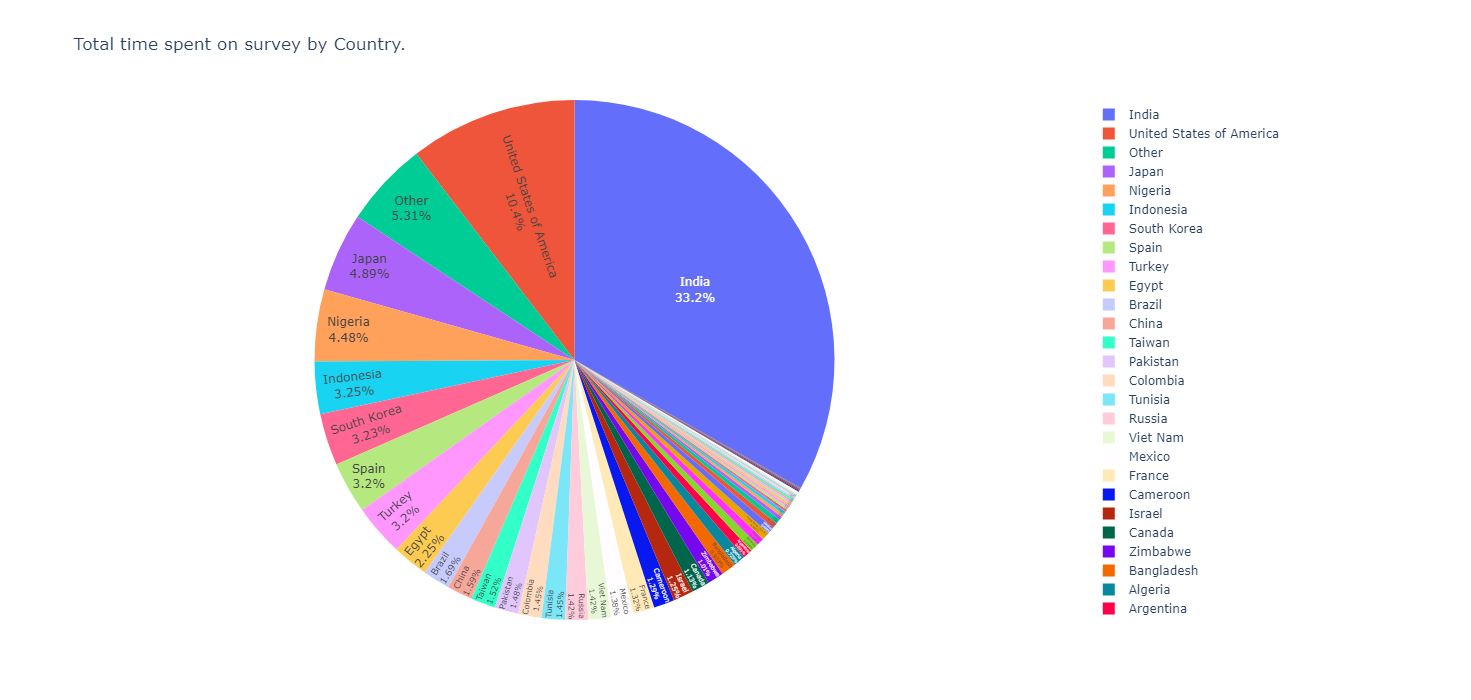

In [7]:
fig = px.pie(
    cumulative_time_by_country_sec_hour, 
    names=cumulative_time_by_country_sec_hour.index, 
    values="Duration (in seconds)_x", 
    height=700, 
    width=1500, 
    hover_data=["Duration (in seconds)_y"], 
    labels={"Duration (in seconds)_x": "Time in seconds", "Duration (in seconds)_y": "Formatted time: (H:M:S)"}, title="Total time spent on survey by Country.")

fig.update_traces(textposition="inside", textinfo="percent+label")

fig.show()

<img src="newplot.png"></img>

### Next I am going to explore age groups involved in the survey.

In [8]:
age_group = pd.DataFrame(data[["Q2"]].iloc[1:,].value_counts(), columns=["Totals"])
age_group.reset_index(inplace=True)
age_group

Q2  Totals
0   18-21    4559
1   25-29    4472
2   22-24    4283
3   30-34    2972
4   35-39    2353
5   40-44    1927
6   45-49    1253
7   50-54     914
8   55-59     611
9   60-69     526
10    70+     127

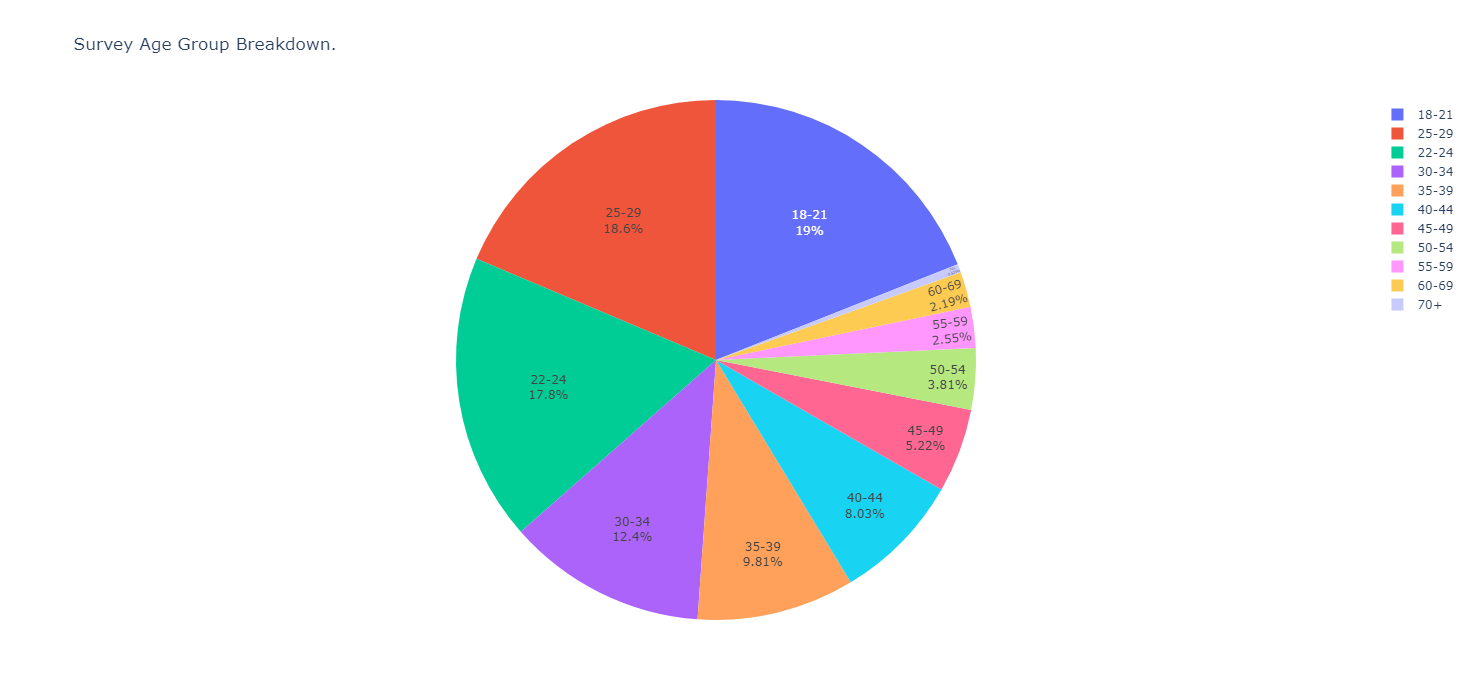

In [9]:
fig = px.pie(age_group, names="Q2", values="Totals", height=700, width=1300, title="Survey Age Group Breakdown.")

fig.update_traces(textposition="inside", textinfo="percent+label")

fig.show()

<img src="age_group.png"></img>

In [10]:
gender_make_up = pd.DataFrame(data[["Q3"]]
                              .iloc[1:,]
                              .value_counts(), columns=["Gender Totals"])
gender_make_up.reset_index(inplace=True)

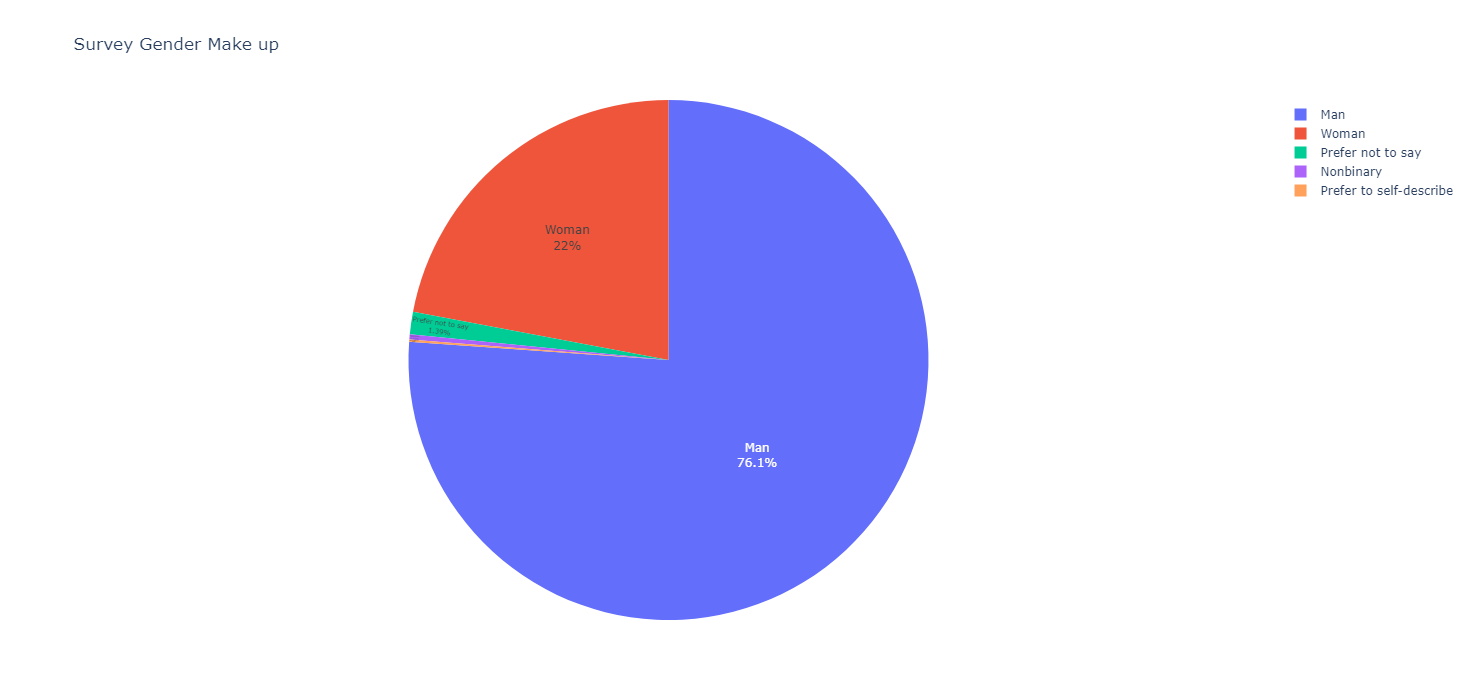

In [11]:
fig = px.pie(gender_make_up, 
             values='Gender Totals', 
             names="Q3", 
             height=700, 
             width=1300, 
             title="Survey Gender Make up", 
             hover_data=["Gender Totals"],)

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

<img src="gender_make_up.png">

- Most participants of the survey are Men.

### Next I am going to look at how the countries are represented in the data.

In [12]:
country_groups = pd.DataFrame(data[["Q4"]].iloc[1:,].value_counts(), columns=["Totals"])
country_groups.reset_index(inplace=True)
country_groups.head()

Q4  Totals
0                     India    8792
1  United States of America    2920
2                     Other    1430
3                    Brazil     833
4                   Nigeria     731

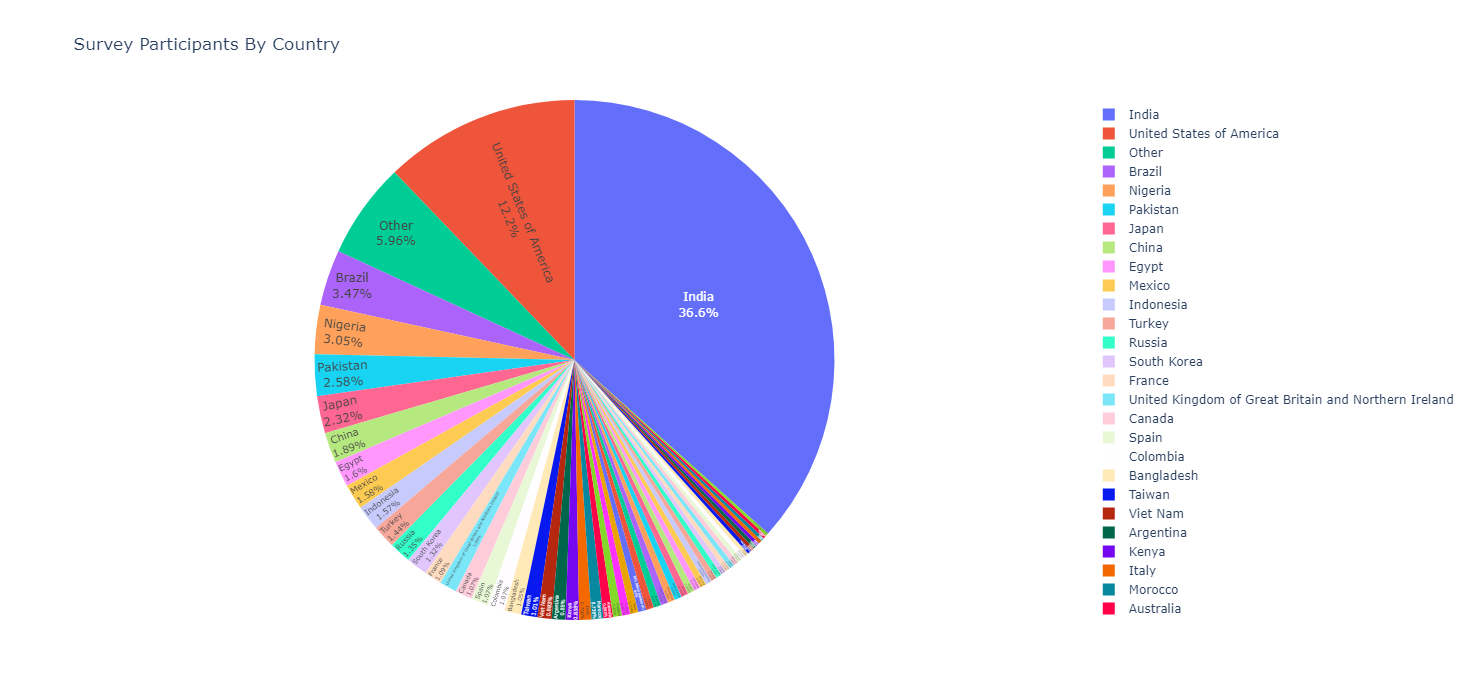

In [13]:
fig = px.pie(country_groups, 
             values='Totals', 
             names="Q4", 
             height=700, 
             width=1300, 
             title="Survey Participants By Country", 
             hover_data=["Q4"], labels={"Q4":"Country"})

fig.update_traces(textposition='inside', textinfo='percent+label')

fig.show()

<img src="country_groups.png">

### I am fascinated by India.
- Are the participants mostly Students?

In [14]:
india_group = data[data["Q4"].eq("India")].groupby("Q5").agg({"Q5":"count"}).rename(columns={"Q5":"Student"})
india_group.rename(index={"No": "Employed", "Yes":"Student"}, inplace=True)

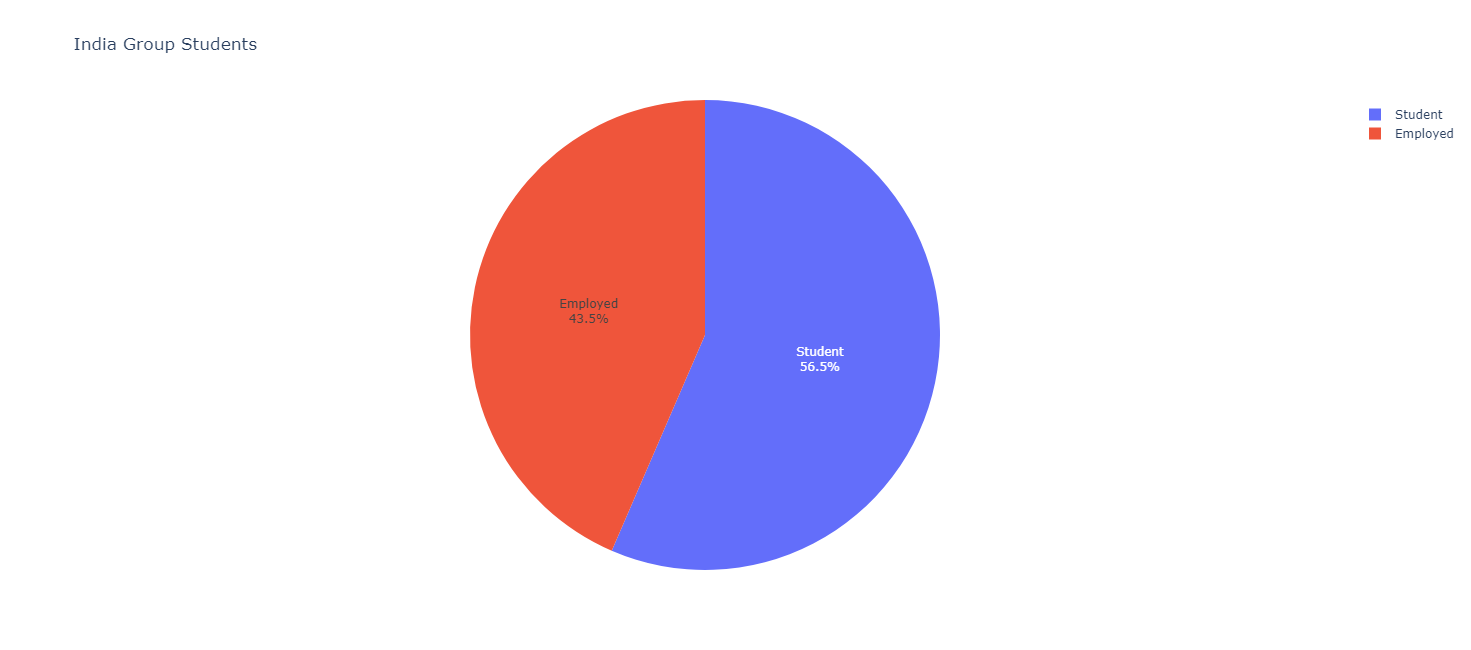

In [15]:
fig = px.pie(india_group, 
             values='Student', 
             names=india_group.index, 
             height=650, 
             width=1300, 
             title="India Group Students", 
             hover_data=["Student"], labels={"Q5":"Status", "Student":"Number"})

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

<img src="india_group.png">

### India had more students participating in the Survey.
- I am curious as to how things look in USA.

In [16]:
usa_group = data[data["Q4"].eq("United States of America")].groupby("Q5").agg({"Q5":"count"}).rename(columns={"Q5":"Student"})
usa_group.rename(index={"No":"Employed", "Yes":"Student"}, inplace=True)

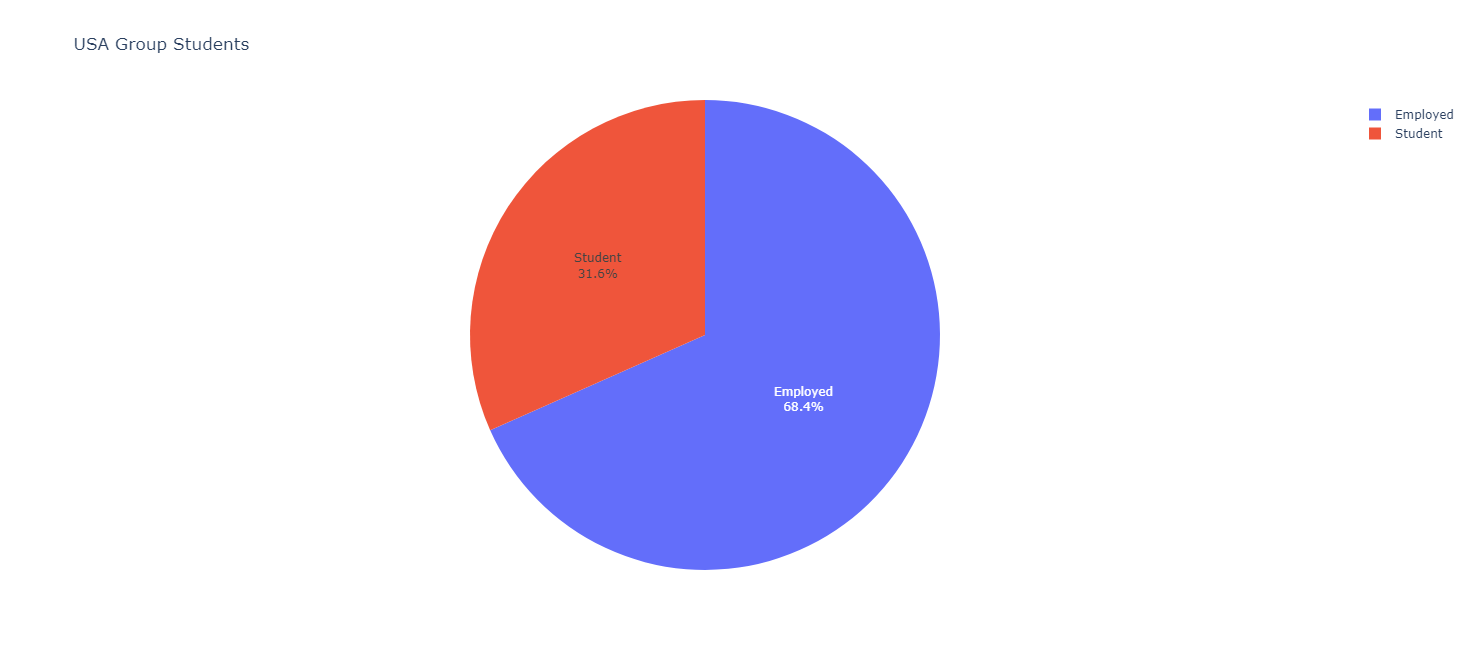

In [17]:
fig = px.pie(usa_group, 
             values='Student', 
             names=usa_group.index, 
             height=650, 
             width=1300, 
             title="USA Group Students", 
             hover_data=["Student"], 
             labels={"Q5":"Status", "Student":"Number"})

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

<img src="usa_group.png">

### The picture is different in the USA. There were less students.
- Since I am in South Africa, I might as well see how things look over here.

In [18]:
sa_group = data[data["Q4"].eq("South Africa")].groupby("Q5").agg({"Q5":"count"}).rename(columns={"Q5":"Student"})
sa_group.rename(index={"No": "Employed", "Yes":"Student"}, inplace=True)

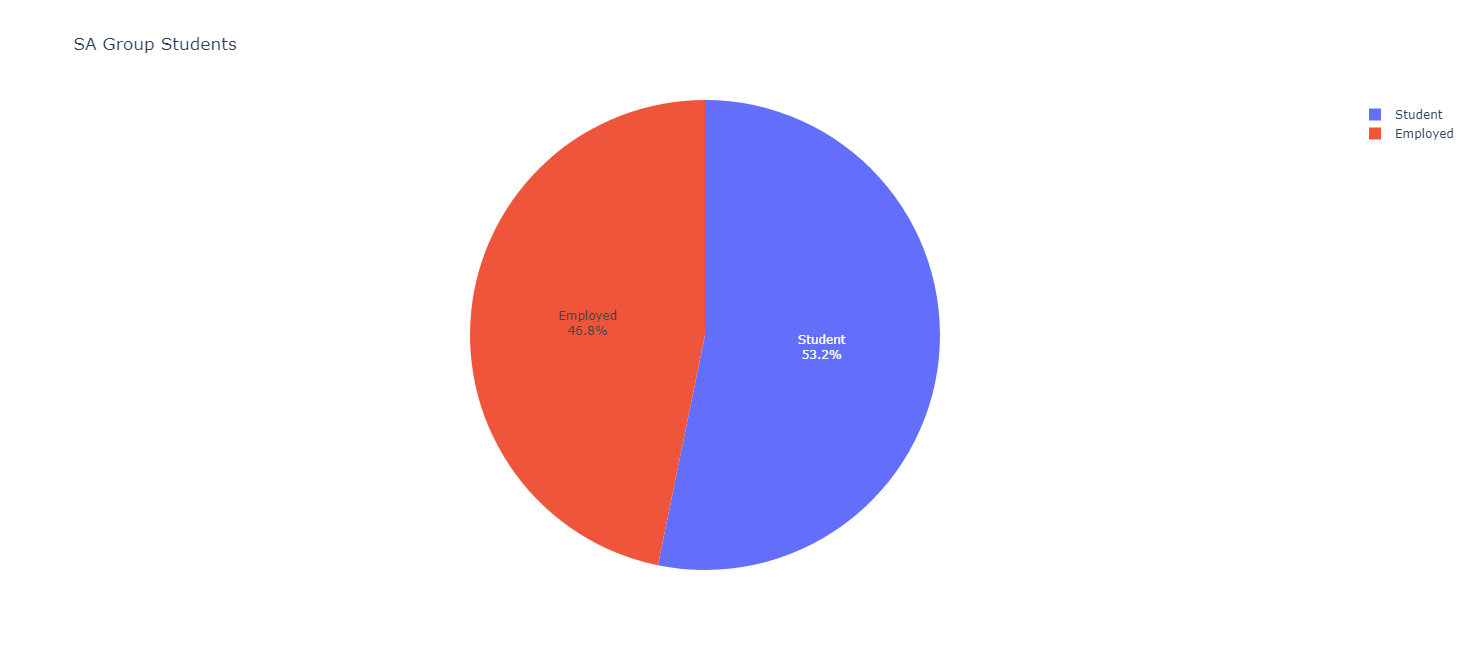

In [19]:
fig = px.pie(sa_group, 
             values='Student', 
             names=sa_group.index, 
             height=650, 
             width=1300, 
             title="SA Group Students", 
             hover_data=["Student"], labels={"Q5":"Status", "Student":"Number"})

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

<img src="sa_group.png">

In [20]:
institution_columns = [column for column in data.columns if column.startswith("Q6")]

In [21]:
institutions = data[institution_columns].iloc[0].str.split("- ").str.get(-1).str.strip()

In [22]:
edu_platforms = pd.DataFrame(data[institution_columns]
                             .rename(columns=dict(zip(institution_columns, institutions))).iloc[1:,]
                             .fillna(0)
                             .ne(0)
                             .sum(), columns=["Totals"]).reset_index().rename(columns={"index":"Platform"}).sort_values(by="Totals")
edu_platforms

Platform  Totals
4                                             Fast.ai     944
8   Cloud-certification programs (direct from AWS,...    1821
5                                             Udacity    2199
1                                                 edX    2474
10                                               None    2643
7                                   LinkedIn Learning    2766
3                                            DataCamp    3718
11                                              Other    5669
6                                               Udemy    6116
2                                Kaggle Learn Courses    6628
9   University Courses (resulting in a university ...    6780
0                                            Coursera    9699

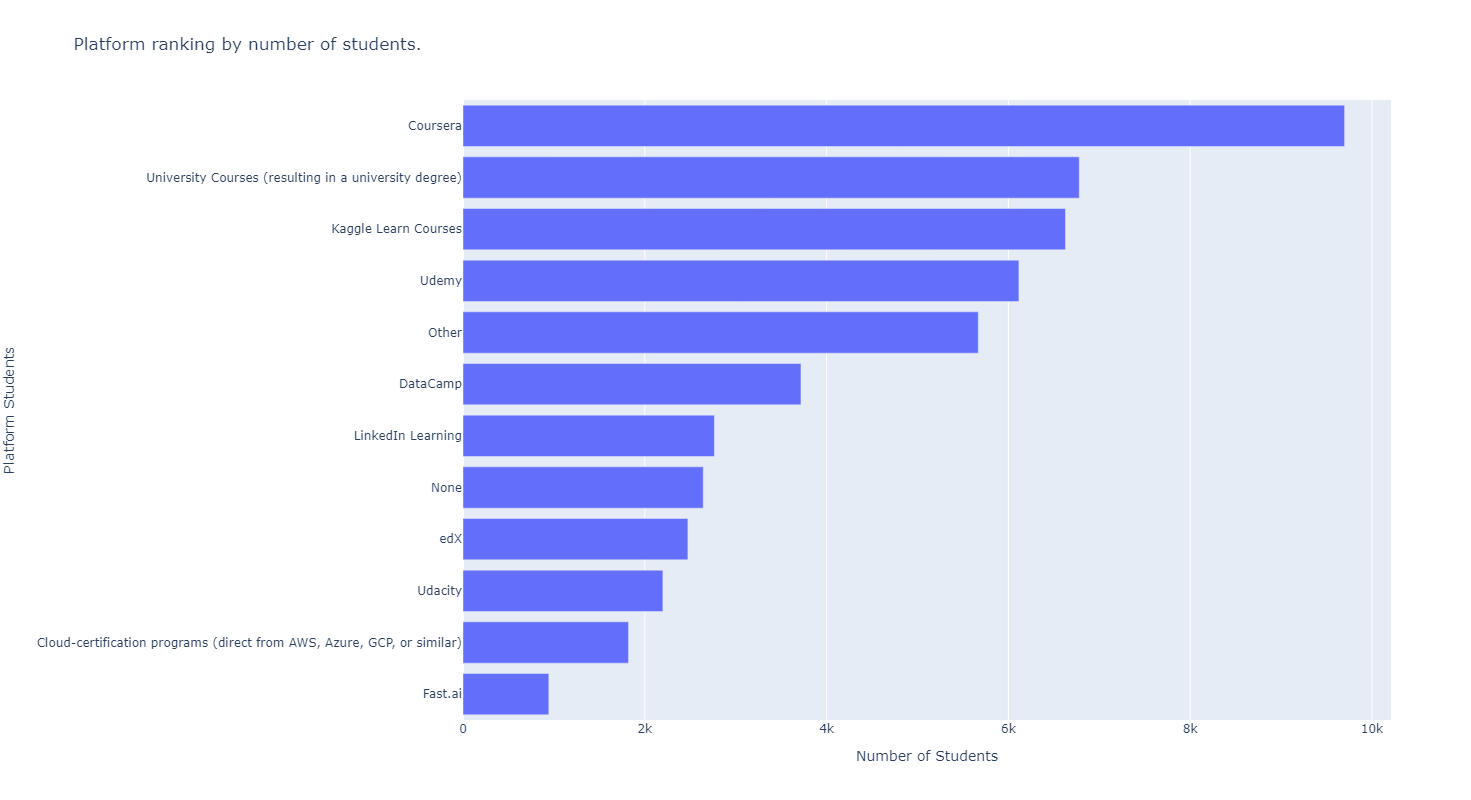

In [23]:
fig = px.bar(edu_platforms, 
             y="Platform", 
             x="Totals", 
             title="Platform ranking by number of students.", 
             labels={"Totals": "Number of Students", "Platform": "Platform Students"}, height=800, width=1500)

fig.show()

<img src="edu_platforms_graph.png">

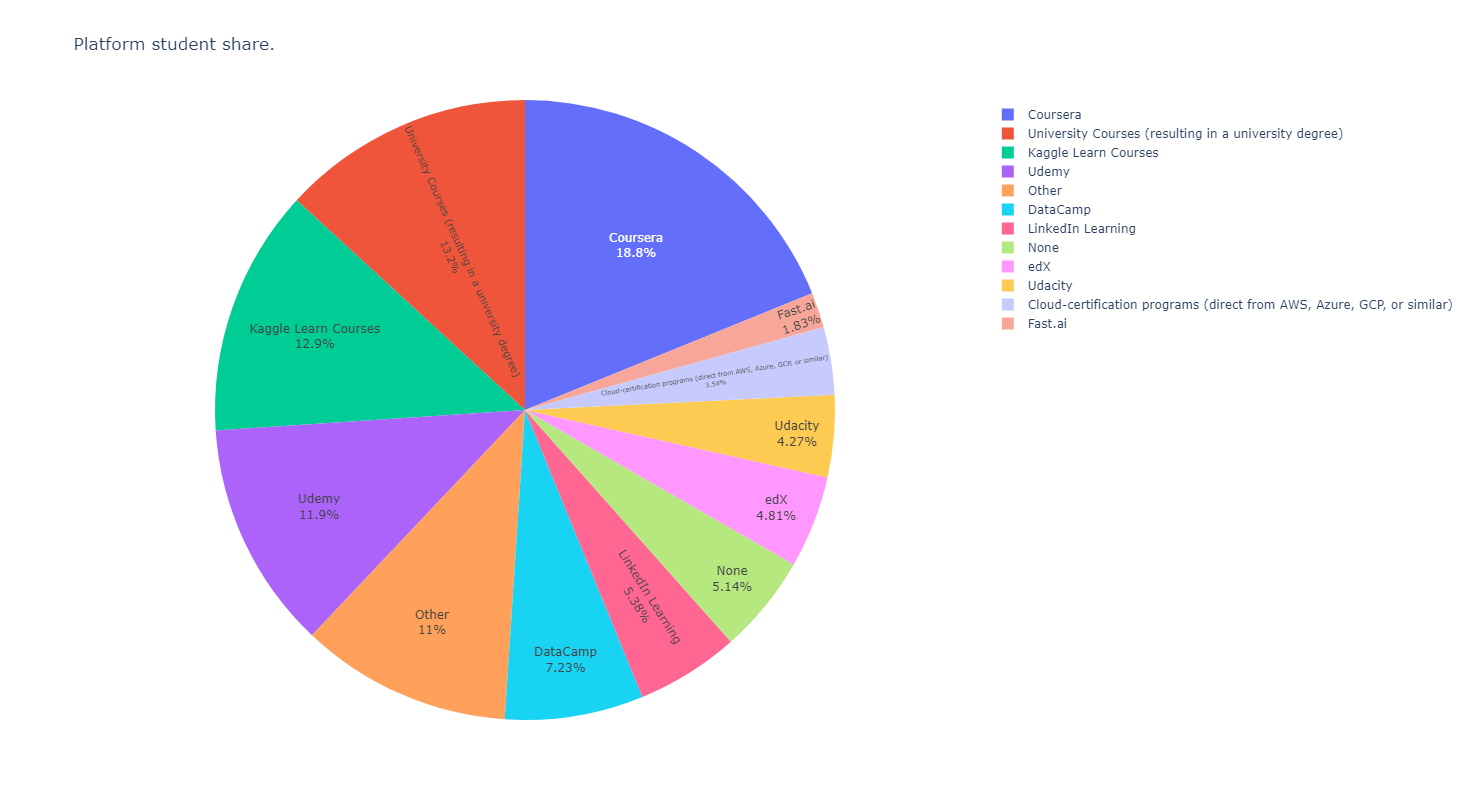

In [24]:
fig = px.pie(edu_platforms, 
             values="Totals", 
             names="Platform", 
             title="Platform student share.", 
             hover_data=["Platform"],
             width=1500, 
             height=800)

fig.update_traces(textposition="inside", textinfo="percent+label")

fig.show()

<img src="edu.png">

In [25]:
coding_lang_columns = [column for column in data.columns if column.startswith("Q12")]
coding_lang_columns

['Q12_1',
 'Q12_2',
 'Q12_3',
 'Q12_4',
 'Q12_5',
 'Q12_6',
 'Q12_7',
 'Q12_8',
 'Q12_9',
 'Q12_10',
 'Q12_11',
 'Q12_12',
 'Q12_13',
 'Q12_14',
 'Q12_15']

In [27]:
coding_lang_names = list(data[coding_lang_columns].iloc[0].str.split("- ").str.get(-1).str.strip())
coding_lang_names

['Python',
 'R',
 'SQL',
 'C',
 'C#',
 'C++',
 'Java',
 'Javascript',
 'Bash',
 'PHP',
 'MATLAB',
 'Julia',
 'Go',
 'None',
 'Other']

In [28]:
dict(zip(coding_lang_columns, coding_lang_names))

{'Q12_1': 'Python',
 'Q12_2': 'R',
 'Q12_3': 'SQL',
 'Q12_4': 'C',
 'Q12_5': 'C#',
 'Q12_6': 'C++',
 'Q12_7': 'Java',
 'Q12_8': 'Javascript',
 'Q12_9': 'Bash',
 'Q12_10': 'PHP',
 'Q12_11': 'MATLAB',
 'Q12_12': 'Julia',
 'Q12_13': 'Go',
 'Q12_14': 'None',
 'Q12_15': 'Other'}

In [29]:
programming_languages = (pd.DataFrame(data[coding_lang_columns]
                                      .iloc[1:,]
                                      .rename(columns=dict(zip(coding_lang_columns, coding_lang_names)))
                                      .fillna(0).ne(0).sum(), columns=["Num_users"]))

programming_languages.sort_values(by="Num_users", ascending=False, inplace=True)
programming_languages

Num_users
Python          18653
SQL              9620
R                4571
C++              4549
Java             3862
C                3801
Javascript       3489
MATLAB           2441
Bash             1674
C#               1473
PHP              1443
Other            1342
Go                322
Julia             296
None              256

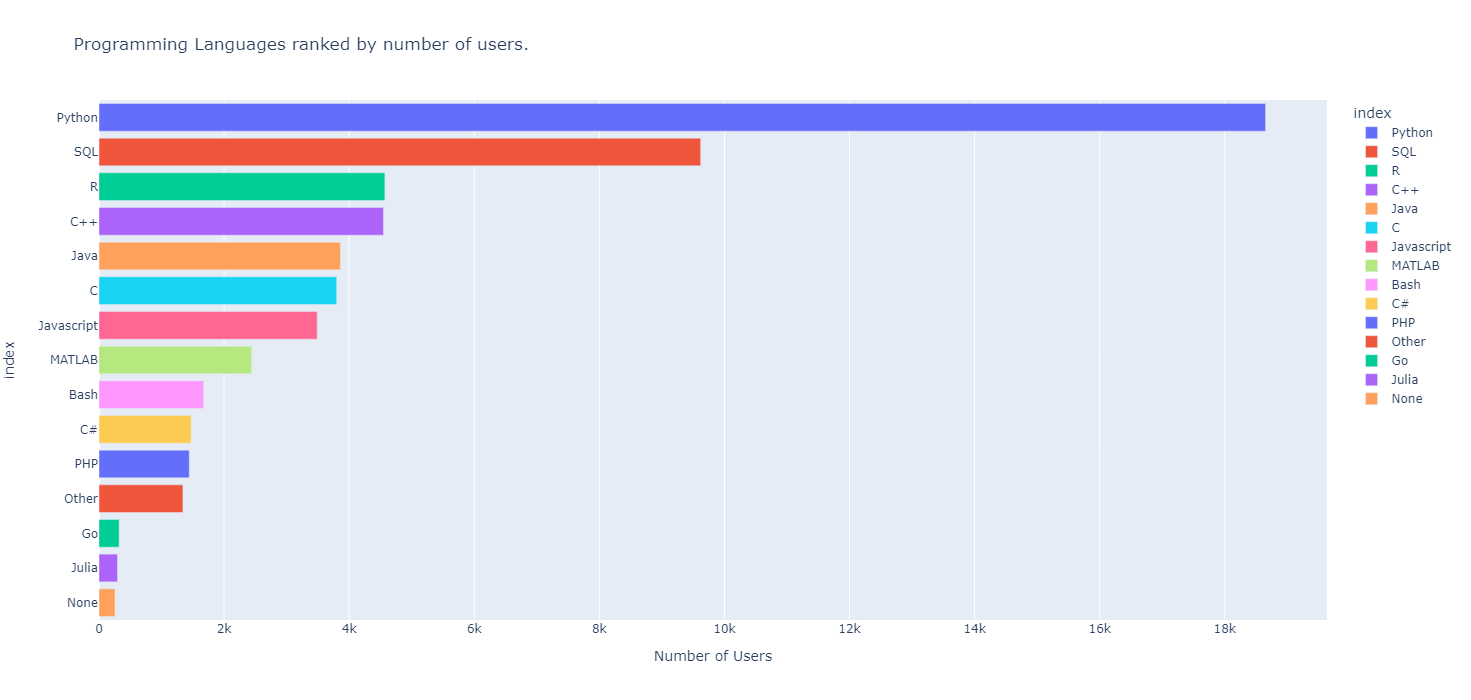

In [30]:
fig = px.bar(programming_languages, 
             y=programming_languages.index, 
             x="Num_users", 
             title="Programming Languages ranked by number of users.", 
             labels={"Num_users": "Number of Users", "Language": "Programming Languages"}, 
             height=700, 
             width=1300, color=programming_languages.index)

fig.show()

<img src="coding_lang.png">

In [45]:
programming_experience = pd.DataFrame(data["Q11"].iloc[1:,].value_counts()).rename(columns={"Q11":"Totals"})
programming_experience

Totals
1-3 years                    6459
< 1 years                    5454
3-5 years                    3399
5-10 years                   2556
I have never written code    2037
10-20 years                  1801
20+ years                    1537

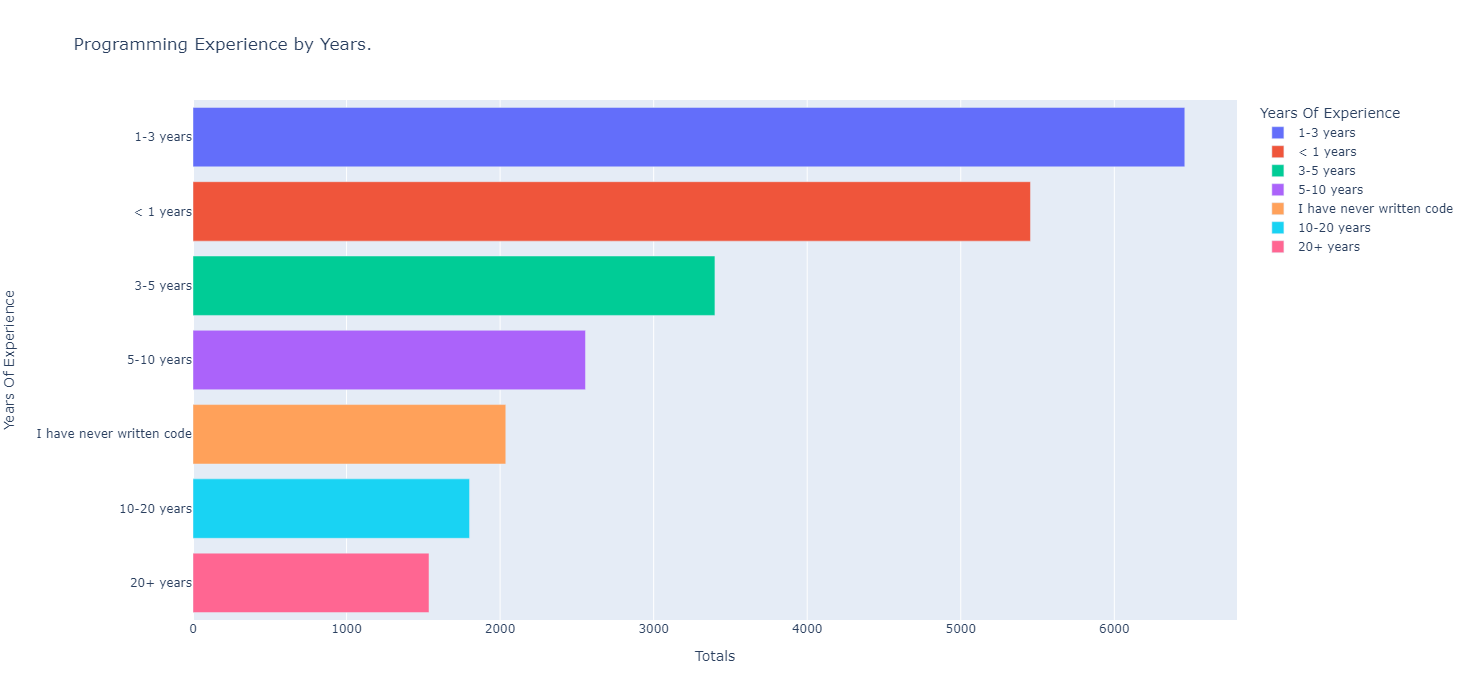

In [49]:
fig = px.bar(programming_experience, 
             x="Totals", 
             y=programming_experience.index, 
             title="Programming Experience by Years.", 
             height=700, 
             width=1300, 
             color=programming_experience.index, labels={"index":"Years Of Experience"})

fig.show()

<img src="programming_experience.png">

- This graph raises several questions that could be explored further. For example, it would be interesting to determine which countries have the highest concentration of experienced programmers and how their earnings compare to those in other countries. It would also be useful to identify the tools and technologies that these experienced programmers commonly use. Understanding these factors could provide insight into the factors that contribute to the earning potential of experienced programmers and help identify potential opportunities for career advancement or skill development. I will not explore these questions at this time.

In [50]:
ide_questions = list(data.columns[data.columns.str.startswith("Q13")])
ide_questions

['Q13_1',
 'Q13_2',
 'Q13_3',
 'Q13_4',
 'Q13_5',
 'Q13_6',
 'Q13_7',
 'Q13_8',
 'Q13_9',
 'Q13_10',
 'Q13_11',
 'Q13_12',
 'Q13_13',
 'Q13_14']

In [64]:
ide_names = list(data[ide_questions].iloc[0].str.split("- ").str.get(-1).str.strip())
ide_names

['JupyterLab',
 'RStudio',
 'Visual Studio',
 'Visual Studio Code (VSCode)',
 'PyCharm',
 'Spyder',
 'Notepad++',
 'Sublime Text',
 'Vim / Emacs',
 'MATLAB',
 'Jupyter Notebook',
 'IntelliJ',
 'None',
 'Other']

In [65]:
dict(zip(ide_questions, ide_names))

{'Q13_1': 'JupyterLab',
 'Q13_2': 'RStudio',
 'Q13_3': 'Visual Studio',
 'Q13_4': 'Visual Studio Code (VSCode)',
 'Q13_5': 'PyCharm',
 'Q13_6': 'Spyder',
 'Q13_7': 'Notepad++',
 'Q13_8': 'Sublime Text',
 'Q13_9': 'Vim / Emacs',
 'Q13_10': 'MATLAB',
 'Q13_11': 'Jupyter Notebook',
 'Q13_12': 'IntelliJ',
 'Q13_13': 'None',
 'Q13_14': 'Other'}

In [78]:
df_ide = (pd.DataFrame(data[ide_questions]
                       .iloc[1:,]
                       .rename(columns=dict(zip(ide_questions, ide_names)))
                       .fillna(0).ne(0).sum(), columns=["Totals"]).sort_values(by="Totals", ascending=False))
df_ide

Totals
Jupyter Notebook              13684
Visual Studio Code (VSCode)    9976
PyCharm                        6099
JupyterLab                     4887
Visual Studio                  4416
Notepad++                      3891
RStudio                        3824
Spyder                         2880
MATLAB                         2302
Sublime Text                   2218
IntelliJ                       1612
Other                          1474
Vim / Emacs                    1448
None                            409

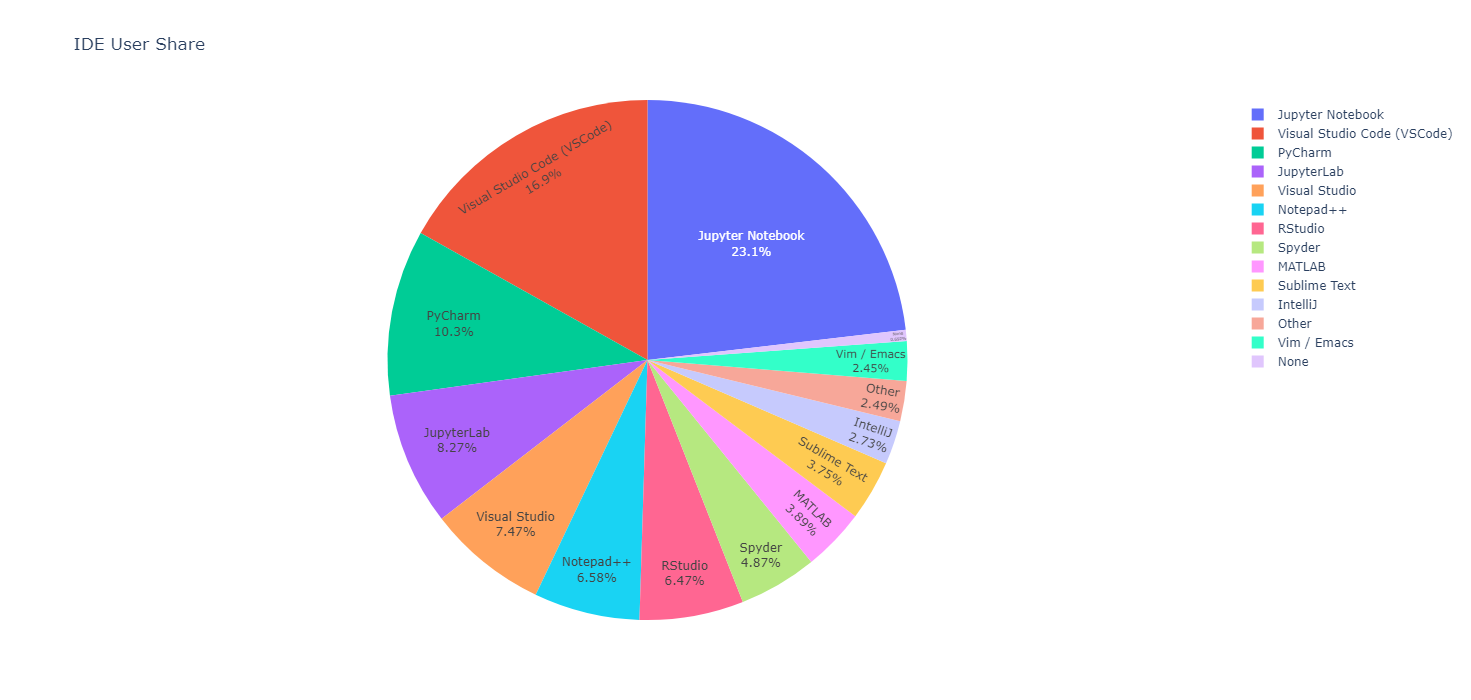

In [71]:
fig = px.pie(df_ide, names=df_ide.index, values="Totals", title="IDE User Share", height=700, width=1300)

fig.update_traces(textposition="inside", textinfo="percent+label")

fig.show()

<img src="ide_users.png">

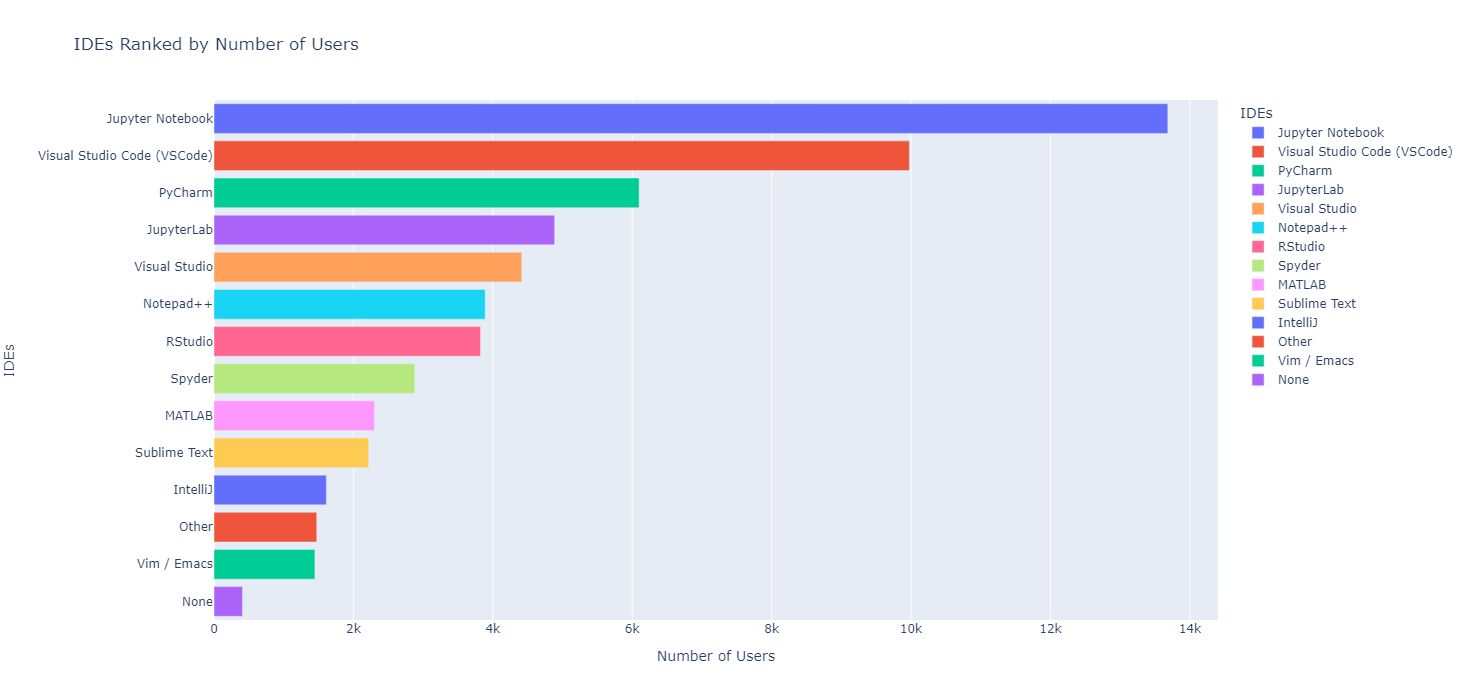

In [81]:
fig = px.bar(df_ide, 
             x="Totals", 
             y=df_ide.index, 
             title="IDEs Ranked by Number of Users", 
             height=700, 
             width=1300, 
             color=df_ide.index, labels={"index":"IDEs", "Totals":"Number of Users"})

fig.show()

<img src="ide_rank.png">

In [86]:
hosted_notebooks_columns = list(data.columns[data.columns.str.startswith("Q14")])
hosted_notebooks_columns

['Q14_1',
 'Q14_2',
 'Q14_3',
 'Q14_4',
 'Q14_5',
 'Q14_6',
 'Q14_7',
 'Q14_8',
 'Q14_9',
 'Q14_10',
 'Q14_11',
 'Q14_12',
 'Q14_13',
 'Q14_14',
 'Q14_15',
 'Q14_16']

In [95]:
hosted_notebooks_names = list(data[hosted_notebooks_columns].iloc[0].str.split("- ").str.get(-1).str.strip())
hosted_notebooks_names

['Kaggle Notebooks',
 'Colab Notebooks',
 'Azure Notebooks',
 'Code Ocean',
 'IBM Watson Studio',
 'Amazon Sagemaker Studio',
 'Amazon Sagemaker Studio Lab',
 'Amazon EMR Notebooks',
 'Google Cloud Vertex AI Workbench',
 'Hex Workspaces',
 'Noteable Notebooks',
 'Databricks Collaborative Notebooks',
 'Deepnote Notebooks',
 'Gradient Notebooks',
 'None',
 'Other']

In [96]:
dict(zip(hosted_notebooks_columns, hosted_notebooks_names))

{'Q14_1': 'Kaggle Notebooks',
 'Q14_2': 'Colab Notebooks',
 'Q14_3': 'Azure Notebooks',
 'Q14_4': 'Code Ocean',
 'Q14_5': 'IBM Watson Studio',
 'Q14_6': 'Amazon Sagemaker Studio',
 'Q14_7': 'Amazon Sagemaker Studio Lab',
 'Q14_8': 'Amazon EMR Notebooks',
 'Q14_9': 'Google Cloud Vertex AI Workbench',
 'Q14_10': 'Hex Workspaces',
 'Q14_11': 'Noteable Notebooks',
 'Q14_12': 'Databricks Collaborative Notebooks',
 'Q14_13': 'Deepnote Notebooks',
 'Q14_14': 'Gradient Notebooks',
 'Q14_15': 'None',
 'Q14_16': 'Other'}

In [106]:
df_hosted_notebook = pd.DataFrame(data[hosted_notebooks_columns]
                                  .iloc[1:,]
                                  .rename(columns=dict(zip(hosted_notebooks_columns, hosted_notebooks_names)))
                                  .fillna(0)
                                  .ne(0)
                                  .sum(), columns=["Totals"]).sort_values(by="Totals", ascending=False)

df_hosted_notebook

Totals
Colab Notebooks                       8929
Kaggle Notebooks                      7478
None                                  6740
IBM Watson Studio                      964
Azure Notebooks                        885
Google Cloud Vertex AI Workbench       870
Amazon Sagemaker Studio                735
Databricks Collaborative Notebooks     610
Other                                  582
Amazon Sagemaker Studio Lab            545
Noteable Notebooks                     299
Deepnote Notebooks                     294
Amazon EMR Notebooks                   260
Gradient Notebooks                     244
Code Ocean                             158
Hex Workspaces                          77

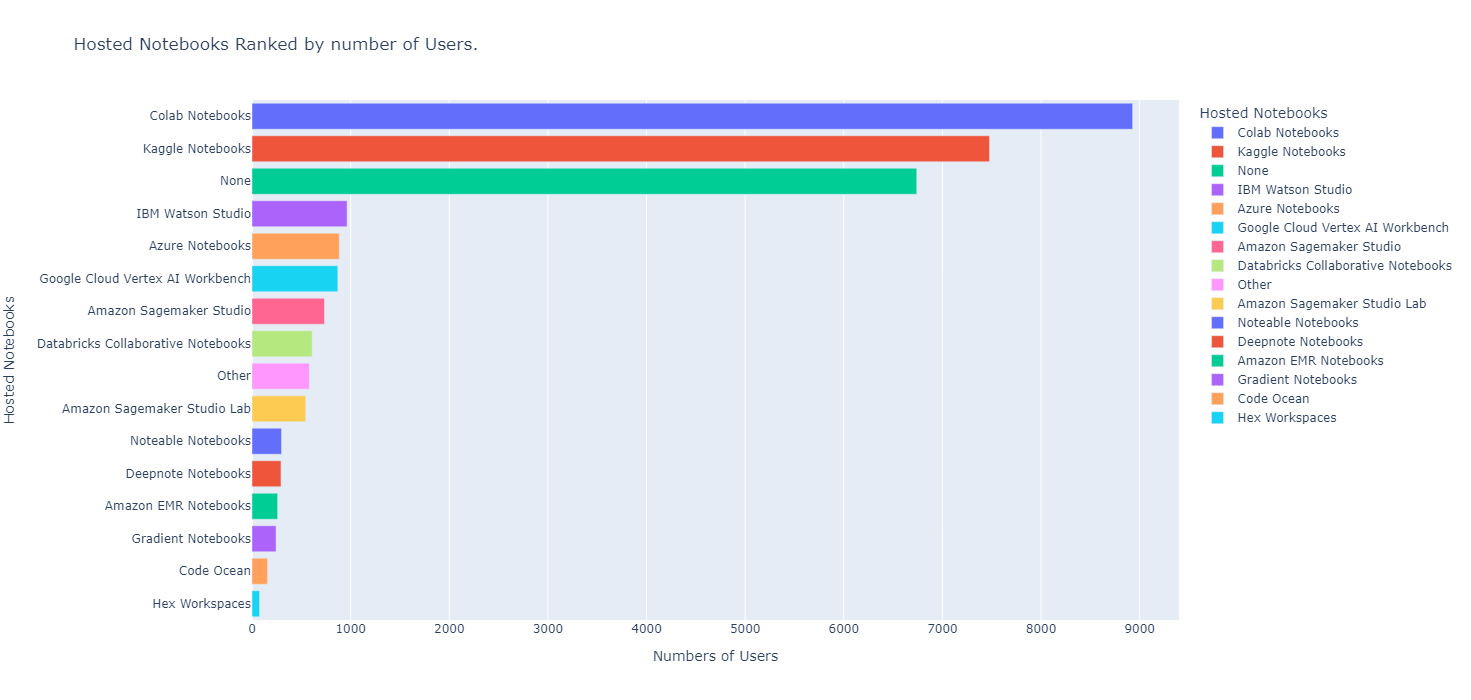

In [109]:
fig = px.bar(df_hosted_notebook, 
             x="Totals", 
             y=df_hosted_notebook.index, 
             title="Hosted Notebooks Ranked by number of Users.", 
             height=700, 
             width=1300, 
             color=df_hosted_notebook.index, labels={"index":"Hosted Notebooks", "Totals":"Numbers of Users"})

fig.show()

<img src="hosted_notebooks.png">

In [110]:
plotting_columns = [column for column in data.columns if column.startswith("Q15")]

In [111]:
plotters = list(data[plotting_columns].iloc[0].str.split('-').str.get(-1).str.strip())

In [112]:
dict(zip(plotting_columns, plotters))

{'Q15_1': 'Matplotlib',
 'Q15_2': 'Seaborn',
 'Q15_3': 'Plotly / Plotly Express',
 'Q15_4': 'Ggplot / ggplot2',
 'Q15_5': 'Shiny',
 'Q15_6': 'D3 js',
 'Q15_7': 'Altair',
 'Q15_8': 'Bokeh',
 'Q15_9': 'Geoplotlib',
 'Q15_10': 'Leaflet / Folium',
 'Q15_11': 'Pygal',
 'Q15_12': 'Dygraphs',
 'Q15_13': 'Highcharter',
 'Q15_14': 'None',
 'Q15_15': 'Other'}

In [116]:
df_plotters = (pd.DataFrame(data[plotting_columns]
                            .rename(columns=dict(zip(plotting_columns, plotters)))
                            .iloc[1:]
                            .fillna(0)
                            .ne(0)
                            .sum(), columns=["Number of Users"]).sort_values(by="Number of Users"))

df_plotters

Number of Users
Highcharter                          198
Dygraphs                             225
Altair                               300
Pygal                                318
Leaflet / Folium                     554
Other                                691
D3 js                                734
Bokeh                                771
Shiny                               1043
Geoplotlib                          1167
None                                3439
Ggplot / ggplot2                    4145
Plotly / Plotly Express             5078
Seaborn                            10512
Matplotlib                         14010

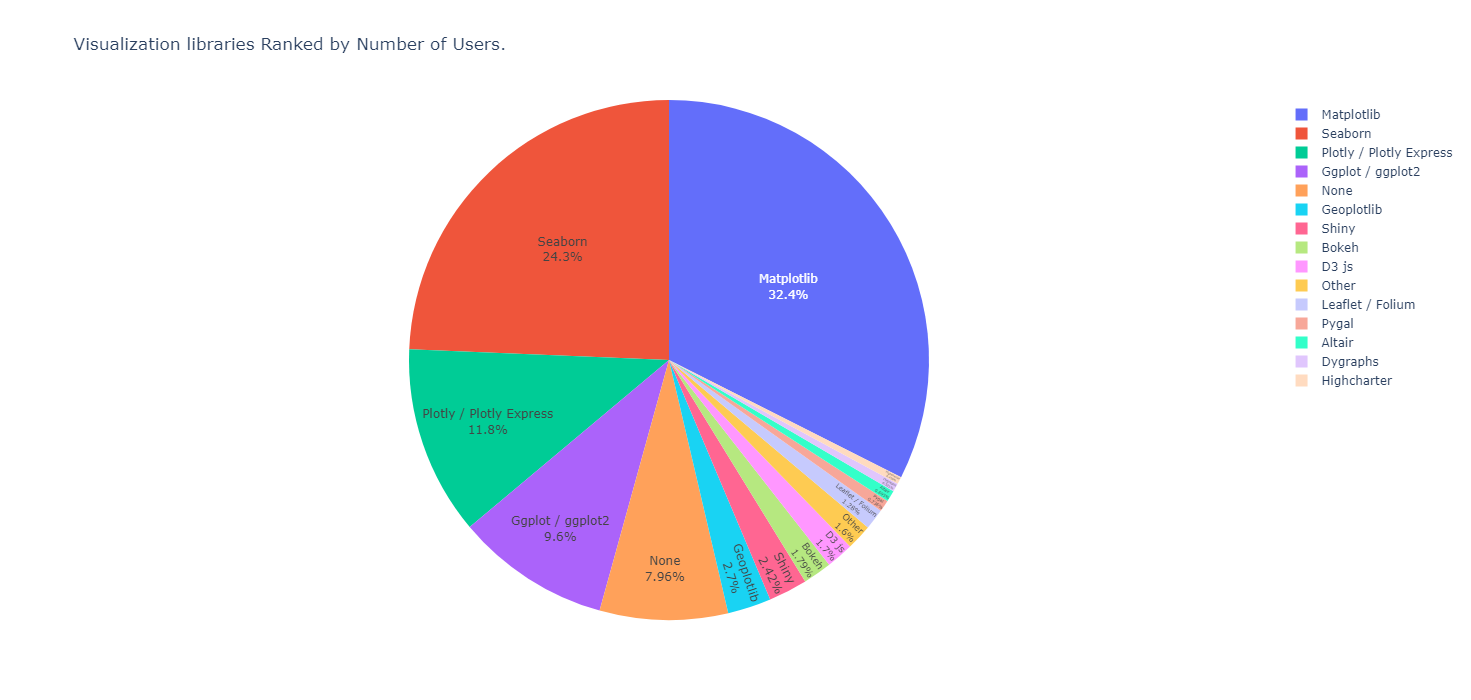

In [117]:
fig = px.pie(df_plotters, names=df_plotters.index, values="Number of Users", title="Visualization libraries Ranked by Number of Users.", height=700, width=1400)

fig.update_traces(textposition='inside', textinfo='percent+label')

fig.show()

<img src="visual_lib.png">

In [15]:
ml_frameworks_columns = list(data.columns[data.columns.str.startswith("Q17")])
ml_frameworks_columns

['Q17_1',
 'Q17_2',
 'Q17_3',
 'Q17_4',
 'Q17_5',
 'Q17_6',
 'Q17_7',
 'Q17_8',
 'Q17_9',
 'Q17_10',
 'Q17_11',
 'Q17_12',
 'Q17_13',
 'Q17_14',
 'Q17_15']

In [18]:
ml_frameworks_names = list(data[ml_frameworks_columns].iloc[0].str.split("- ").str.get(-1).str.strip())

In [33]:
df_ml_frameworks = (pd.DataFrame(data[ml_frameworks_columns]
                                 .rename(columns=dict(zip(ml_frameworks_columns, ml_frameworks_names)))
                                 .iloc[1:,]
                                 .fillna(0)
                                 .ne(0)
                                 .sum(), columns=["Num_users"])).sort_values(by="Num_users", ascending=False)

df_ml_frameworks

Num_users
Scikit-learn           11403
TensorFlow              7953
Keras                   6575
PyTorch                 5191
Xgboost                 4477
LightGBM                1940
None                    1709
Huggingface             1332
CatBoost                1165
PyTorch Lightning       1013
Caret                    821
Fast.ai                  648
Other                    620
Tidymodels               547
JAX                      252

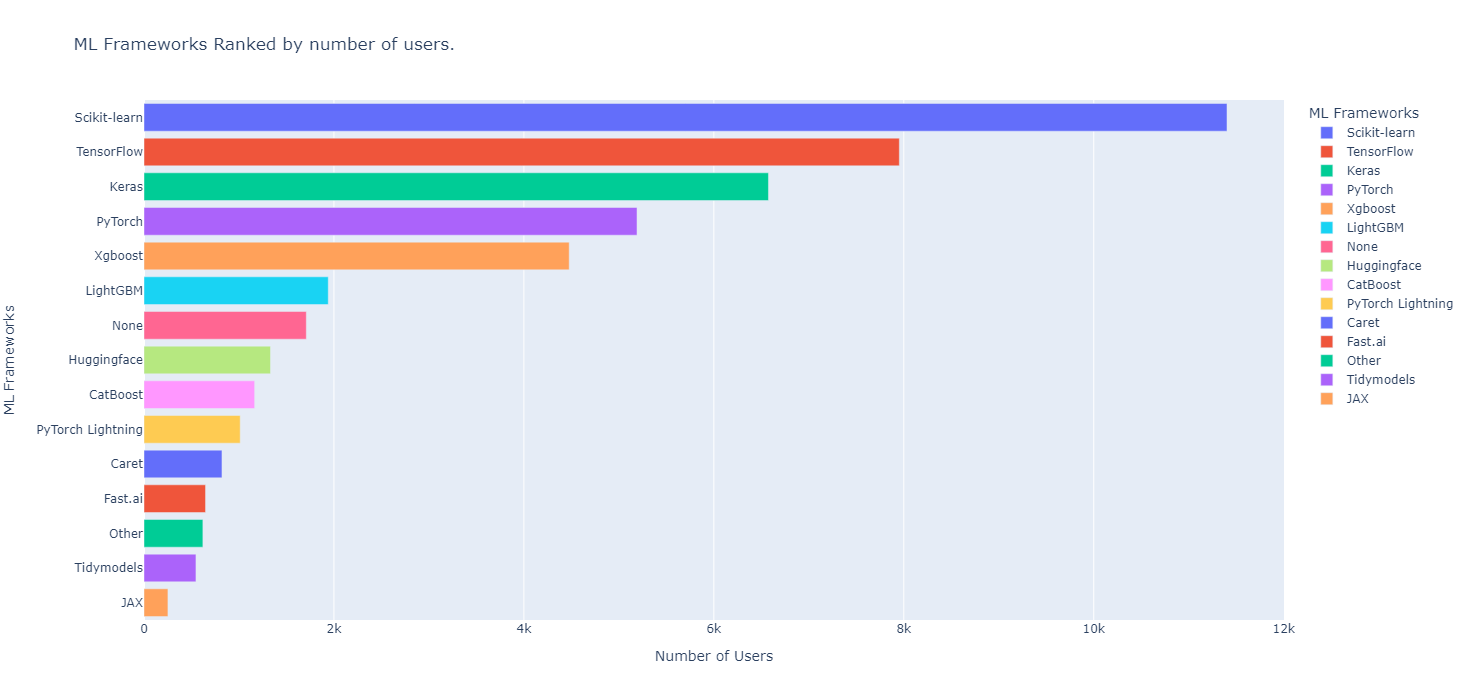

In [38]:
fig = px.bar(df_ml_frameworks, 
             x="Num_users", 
             y=df_ml_frameworks.index, 
             color=df_ml_frameworks.index, 
             height=700, 
             width=1300, 
             title="ML Frameworks Ranked by number of users.", 
             labels={"index":"ML Frameworks", "Num_users":"Number of Users"})

fig.show()

- According to this graph, sk-learn appears to be the most commonly used machine learning framework. However, it is worth considering whether this accurately reflects the overall usage of sk-learn, as TensorFlow and Keras are often used together.

<img src="ml_frameworks.png">

In [42]:
algorithms_columns = list(data.columns[data.columns.str.startswith("Q18")])
algorithms_columns

['Q18_1',
 'Q18_2',
 'Q18_3',
 'Q18_4',
 'Q18_5',
 'Q18_6',
 'Q18_7',
 'Q18_8',
 'Q18_9',
 'Q18_10',
 'Q18_11',
 'Q18_12',
 'Q18_13',
 'Q18_14']

In [43]:
algorithm_names = list(data[algorithms_columns].iloc[0].str.split("- ").str.get(-1).str.strip())
algorithm_names

['Linear or Logistic Regression',
 'Decision Trees or Random Forests',
 'Gradient Boosting Machines (xgboost, lightgbm, etc)',
 'Bayesian Approaches',
 'Evolutionary Approaches',
 'Dense Neural Networks (MLPs, etc)',
 'Convolutional Neural Networks',
 'Generative Adversarial Networks',
 'Recurrent Neural Networks',
 'Transformer Networks (BERT, gpt-3, etc)',
 'Autoencoder Networks (DAE, VAE, etc)',
 'Graph Neural Networks',
 'None',
 'Other']

In [44]:
dict(zip(algorithms_columns, algorithm_names))

{'Q18_1': 'Linear or Logistic Regression',
 'Q18_2': 'Decision Trees or Random Forests',
 'Q18_3': 'Gradient Boosting Machines (xgboost, lightgbm, etc)',
 'Q18_4': 'Bayesian Approaches',
 'Q18_5': 'Evolutionary Approaches',
 'Q18_6': 'Dense Neural Networks (MLPs, etc)',
 'Q18_7': 'Convolutional Neural Networks',
 'Q18_8': 'Generative Adversarial Networks',
 'Q18_9': 'Recurrent Neural Networks',
 'Q18_10': 'Transformer Networks (BERT, gpt-3, etc)',
 'Q18_11': 'Autoencoder Networks (DAE, VAE, etc)',
 'Q18_12': 'Graph Neural Networks',
 'Q18_13': 'None',
 'Q18_14': 'Other'}

In [55]:
df_ml_algorithms = (pd.DataFrame(data[algorithms_columns]
                                .rename(columns=dict(zip(algorithms_columns, algorithm_names)))
                                .iloc[1:,]
                                .fillna(0)
                                .ne(0)
                                .sum(), columns=["Totals"])).sort_values(by="Totals", ascending=False)

df_ml_algorithms

Totals
Linear or Logistic Regression                        11338
Decision Trees or Random Forests                      9373
Convolutional Neural Networks                         6006
Gradient Boosting Machines (xgboost, lightgbm, ...    5506
Bayesian Approaches                                   3661
Dense Neural Networks (MLPs, etc)                     3476
Recurrent Neural Networks                             3451
Transformer Networks (BERT, gpt-3, etc)               2196
Graph Neural Networks                                 1422
None                                                  1326
Autoencoder Networks (DAE, VAE, etc)                  1234
Generative Adversarial Networks                       1166
Evolutionary Approaches                                823
Other                                                  538

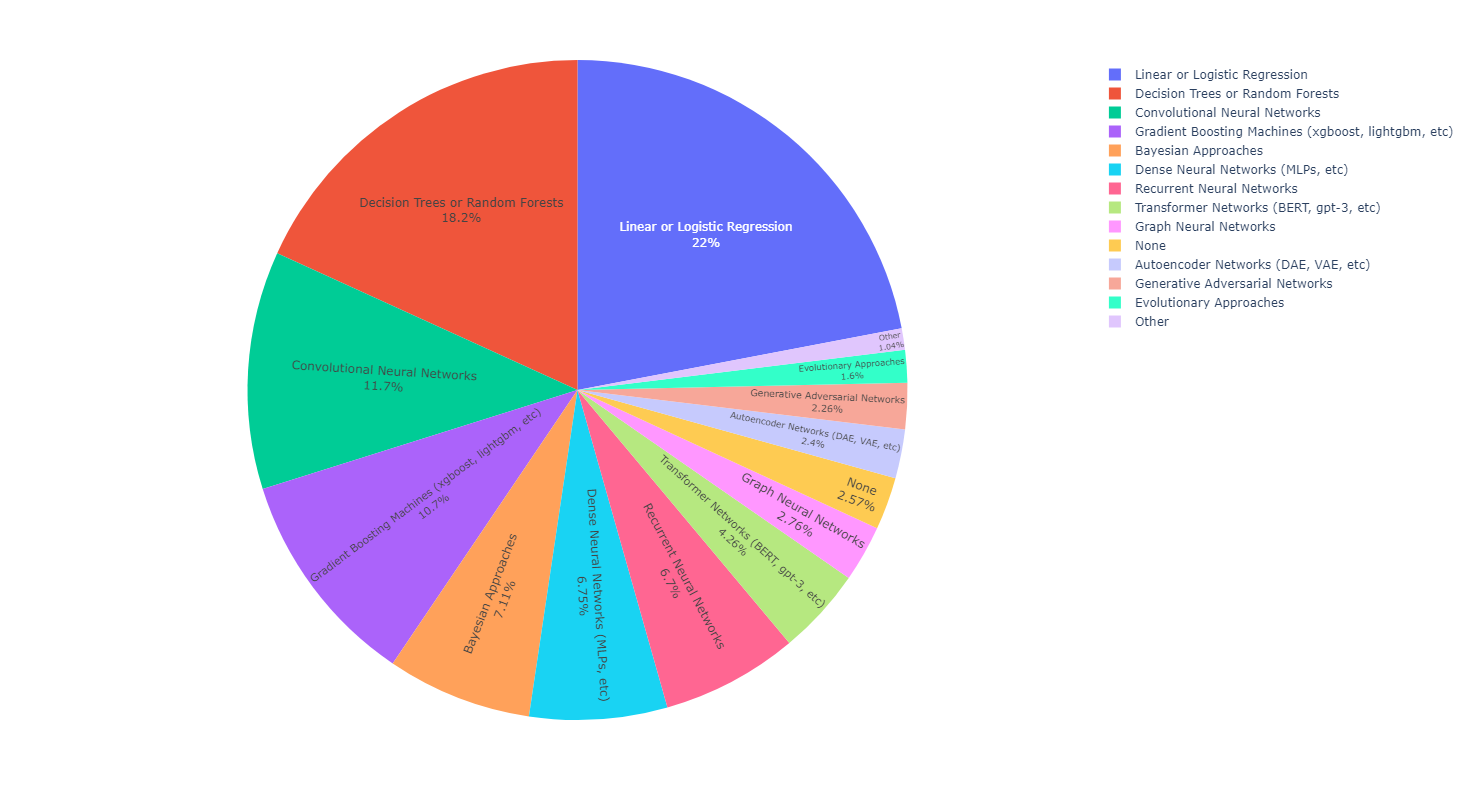

In [59]:
fig = px.pie(df_ml_algorithms, values="Totals" , names=df_ml_algorithms.index, height=800, width=1300)

fig.update_traces(textposition='inside', textinfo='percent+label')

fig.show()

<img src="ml_algo_pie.png">

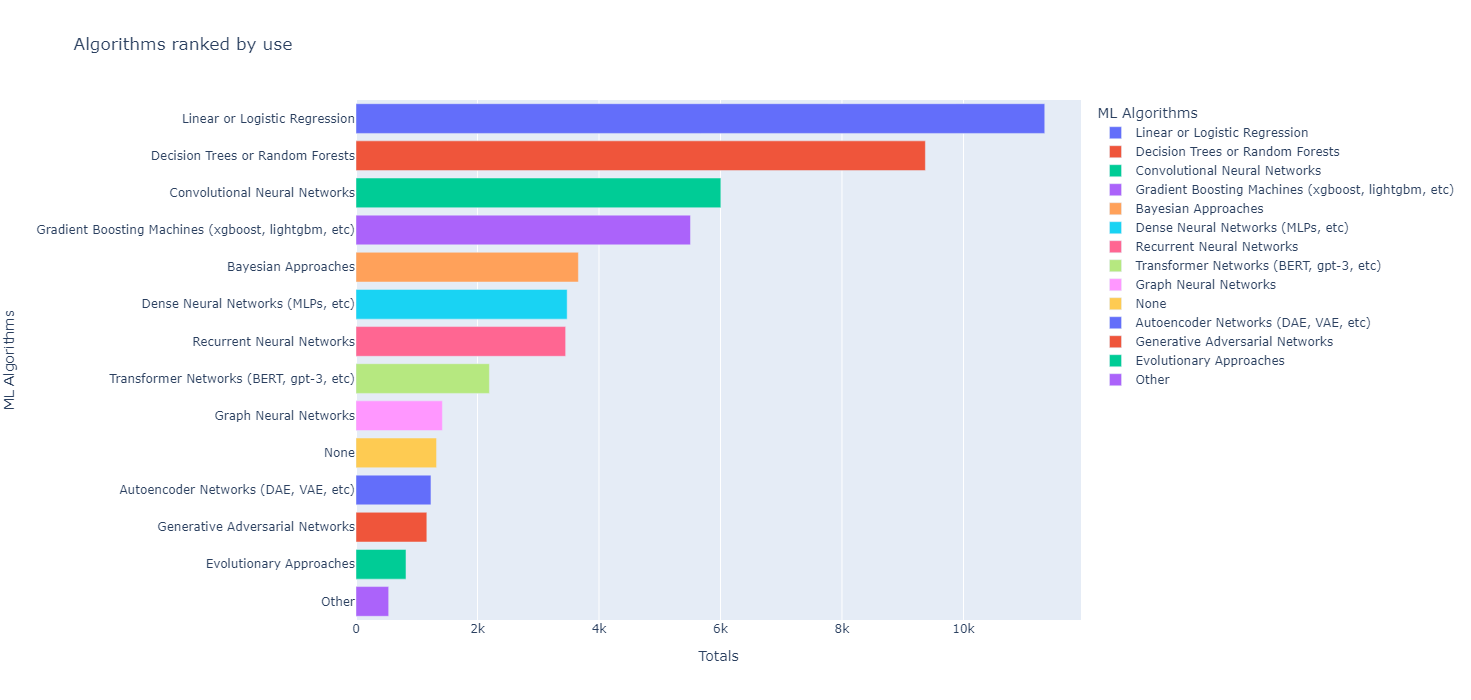

In [64]:
fig = px.bar(df_ml_algorithms, 
             x="Totals", 
             y=df_ml_algorithms.index, 
             title="Algorithms ranked by use", 
             height=700, 
             width=1300, 
             color=df_ml_algorithms.index, labels={'index':'ML Algorithms'})

fig.show()

<img src="ml_algo_bar.png">

In [73]:
ranked_roles = pd.DataFrame(data["Q23"].fillna(0).value_counts().iloc[1:-1]).rename(columns={"Q23":"Totals"}).sort_values(by="Totals")
ranked_roles

Totals
Developer Advocate                                      61
Data Administrator                                      70
Data Architect                                          95
Statistician                                           125
Data Engineer                                          352
Engineer (non-software)                                465
Machine Learning/ MLops Engineer                       571
Research Scientist                                     593
Other                                                  754
Manager (Program, Project, Operations, Executiv...     832
Teacher / professor                                    833
Software Engineer                                      980
Currently not employed                                1432
Data Analyst (Business, Marketing, Financial, Q...    1538
Data Scientist                                        1929

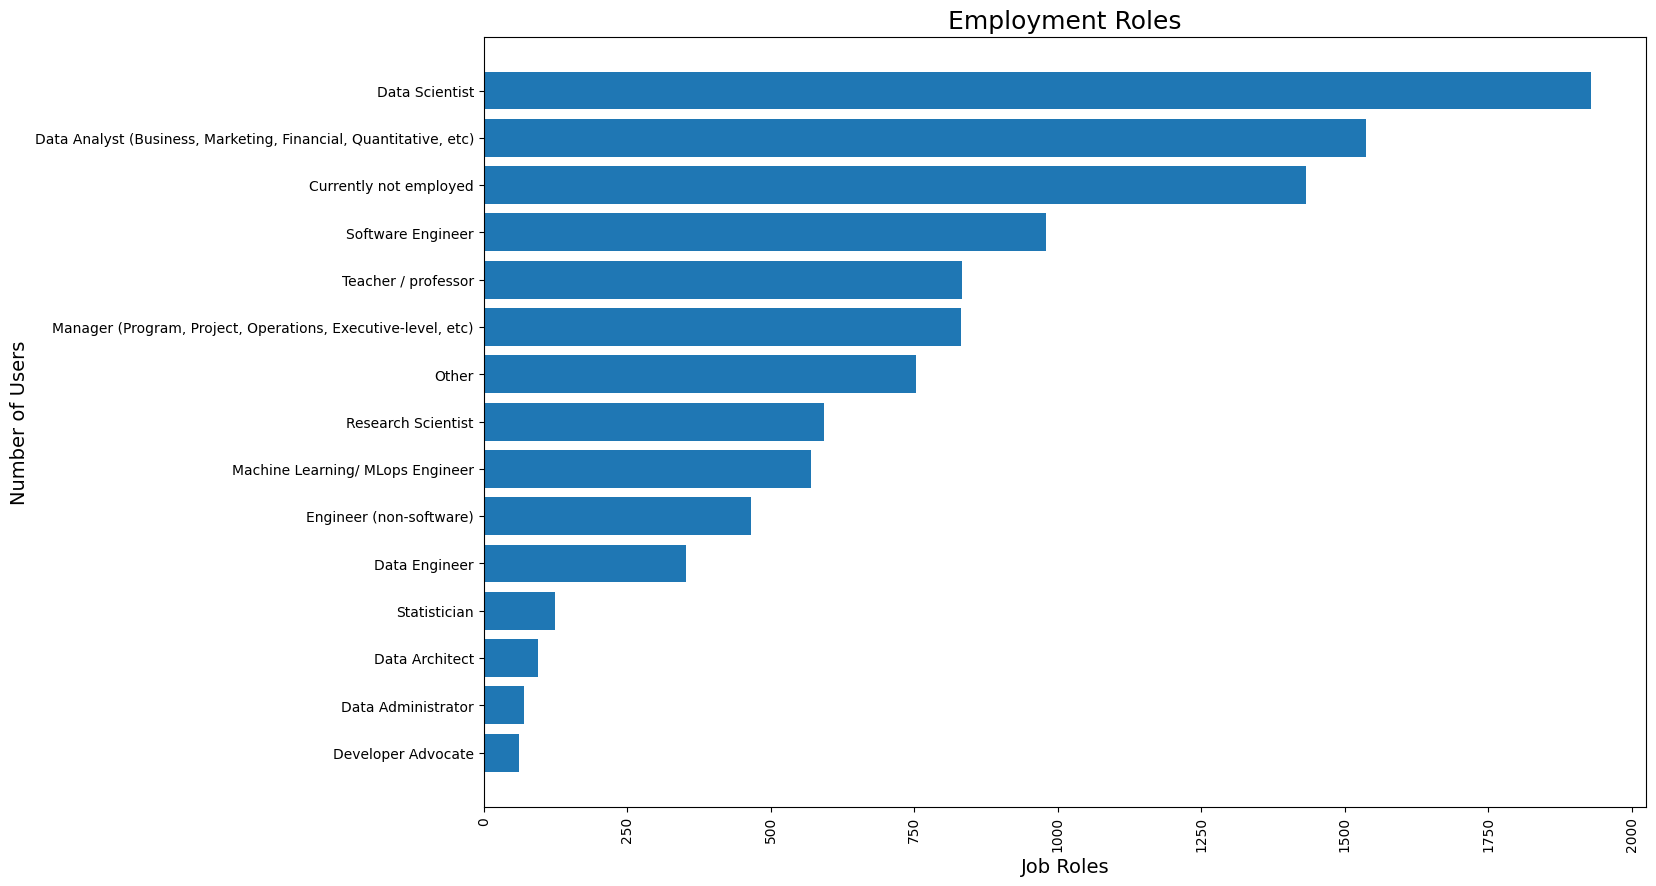

In [75]:
plt.figure(figsize=(15,10))

plt.xticks(rotation=90)
plt.xlabel("Job Roles", fontsize=14)
plt.ylabel("Number of Users", fontsize=14)
plt.title("Employment Roles", fontsize=18)

plt.barh(y=ranked_roles.index, width=ranked_roles["Totals"])

plt.show()

In [76]:
employers = pd.DataFrame(data["Q24"].iloc[1:,].fillna(0).value_counts()).rename(columns={"Q24":"Totals"}).iloc[1:,].sort_values(by="Totals")
employers.head()

Totals
Shipping/Transportation         150
Broadcasting/Communications     179
Non-profit/Service              194
Marketing/CRM                   246
Insurance/Risk Assessment       256

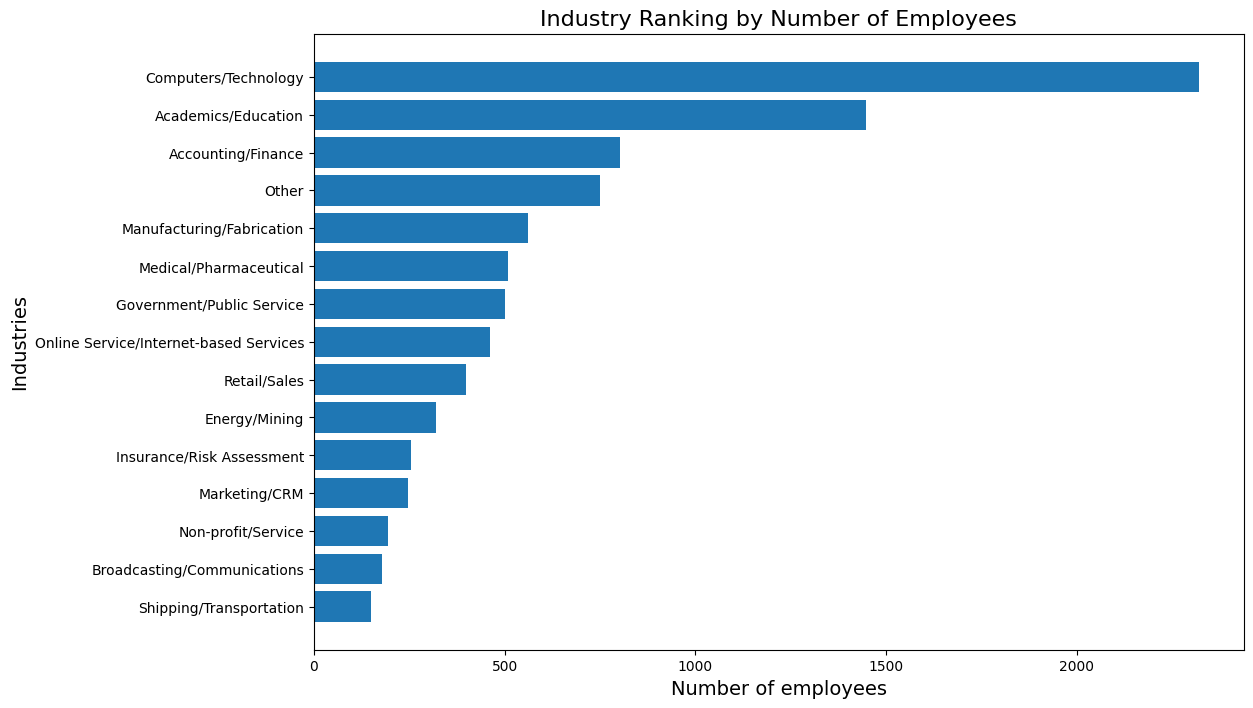

In [77]:
plt.figure(figsize=(12,8))

plt.xlabel("Number of employees", fontsize=14)
plt.ylabel("Industries", fontsize=14)
plt.title("Industry Ranking by Number of Employees", fontsize=16)

plt.barh(y=employers.index, width=employers["Totals"])

plt.show()

In [78]:
company_size = pd.DataFrame(data["Q25"].iloc[1:,].fillna(0).value_counts()).rename(columns={"Q25":"Totals"}).iloc[1:,].sort_values(by="Totals")

company_size

Totals
250-999 employees           1362
50-249 employees            1564
1000-9,999 employees        1888
10,000 or more employees    2122
0-49 employees              2130

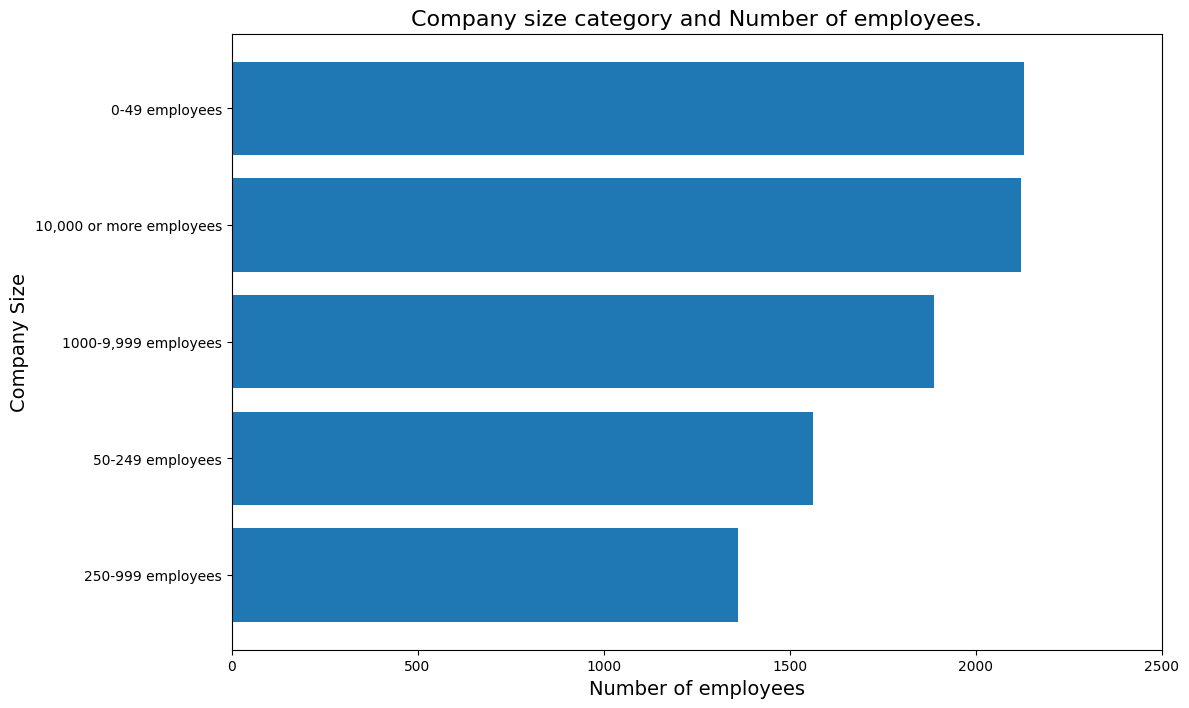

In [80]:
plt.figure(figsize=(12,8))

plt.xlabel("Number of employees", fontsize=14)
plt.ylabel("Company Size", fontsize=14)
plt.title("Company size category and Number of employees.", fontsize=16)
plt.xlim(0, 2500)

plt.barh(y=company_size.index, width=company_size["Totals"])

plt.show()

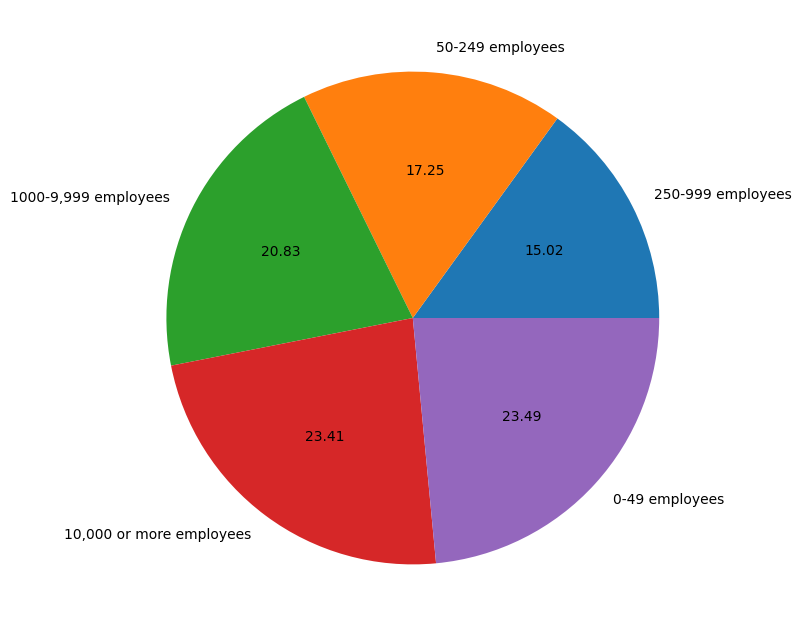

In [81]:
plt.figure(figsize=(12,8))

plt.pie(x=company_size["Totals"], labels=company_size.index, autopct="%.2f")

plt.show()

In [71]:
with open("simpler_countries.json", encoding="utf-8") as geo:
    text = geo.readlines()
    file = json.loads(text[0])

print(file["features"][0]["properties"]["iso_a3"])

CRI


In [72]:
country_names = [file["features"][i]["properties"]["admin"] for i in range(len(file["features"]))]
len(country_names)

168

In [73]:
iso_codes = [file["features"][i]["properties"]["iso_a3"] for i in range(len(file["features"]))]
len(iso_codes)

168

In [74]:
country_with_iso_codes = dict(zip(country_names, iso_codes))

In [75]:
country_with_iso_codes[data.iloc[23994]["Q4"]]

'USA'

In [76]:
geo_data = {"Q4":country_names, "iso":iso_codes}
df_geo_data = pd.DataFrame(geo_data)

In [77]:
df_with_iso = data.merge(df_geo_data, how="inner", on="Q4")

In [79]:
men = gender_country[gender_country["Q3"].eq("Man")]
women = gender_country[gender_country["Q3"].eq("Woman")]

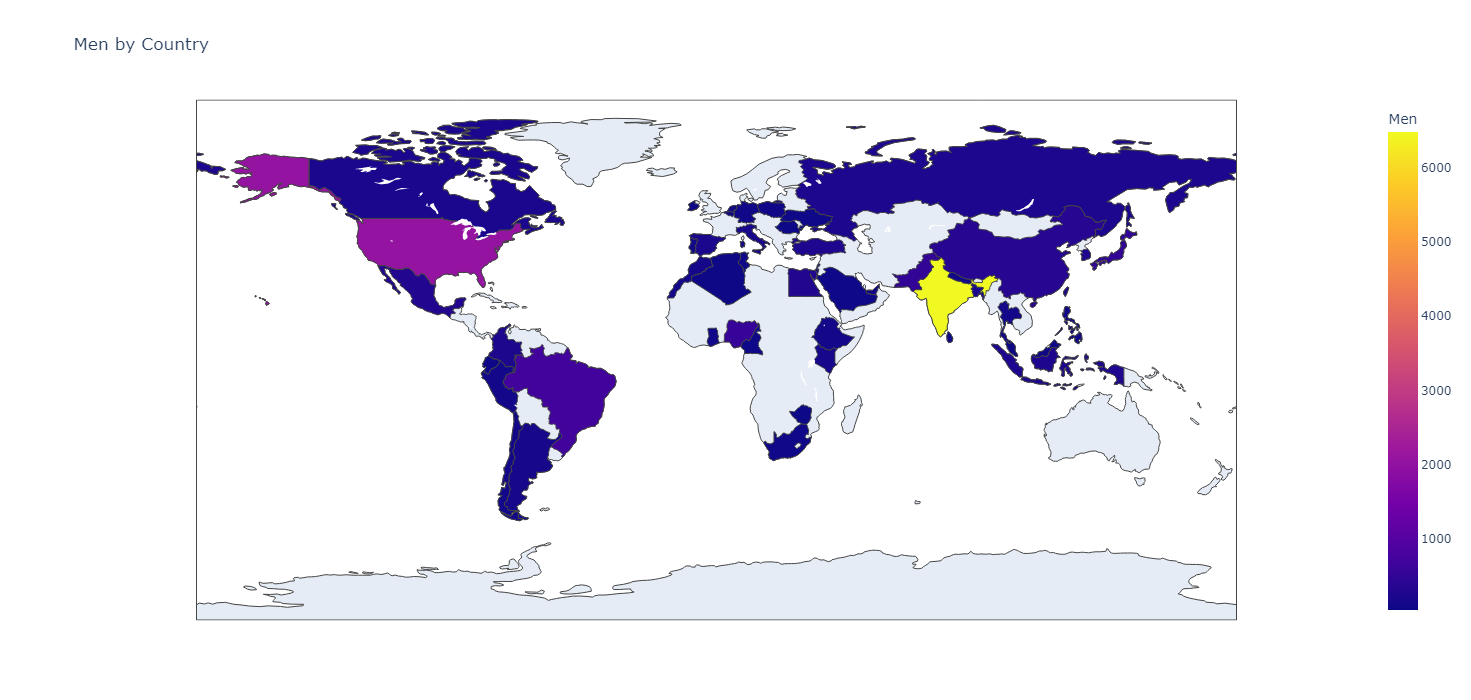

In [81]:
fig = px.choropleth(men_group_by_country, 
                    locations="iso", 
                    color="Men", 
                    hover_name="Country", 
                    title="Men by Country", 
                    height=700, 
                    width=1000, 
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

In [271]:
[column for column in data.columns if column.startswith("Q23")]

['Q23']

There seems to be a lot of people people who are either students or unemployed. A lot of data Scientists participated in this survey.

In [325]:
company_size = pd.DataFrame(data["Q25"].iloc[1:,].fillna(0).value_counts()).rename(columns={"Q25":"Totals"}).iloc[1:,].sort_values(by="Totals")

Small to medium companies are responsible for most of the employment in the space.

In [360]:
bi_columns = [column for column in data.columns if column.startswith("Q36")]
bi_columns

['Q36_1',
 'Q36_2',
 'Q36_3',
 'Q36_4',
 'Q36_5',
 'Q36_6',
 'Q36_7',
 'Q36_8',
 'Q36_9',
 'Q36_10',
 'Q36_11',
 'Q36_12',
 'Q36_13',
 'Q36_14',
 'Q36_15']

In [371]:
bi_names = list(data[bi_columns].iloc[0].str.split("- ").str.get(-1).str.strip())

In [384]:
ranked_bi_tools = pd.DataFrame(data[bi_columns].rename(columns=dict(zip(bi_columns, bi_names))).iloc[1:,].fillna(0).ne(0).sum(), columns=["Totals"]).sort_values(by="Totals")
ranked_bi_tools.head()

Totals
Thoughtspot              22
Sisense                  38
Domo                     44
TIBCO Spotfire           86
SAP Analytics Cloud     106

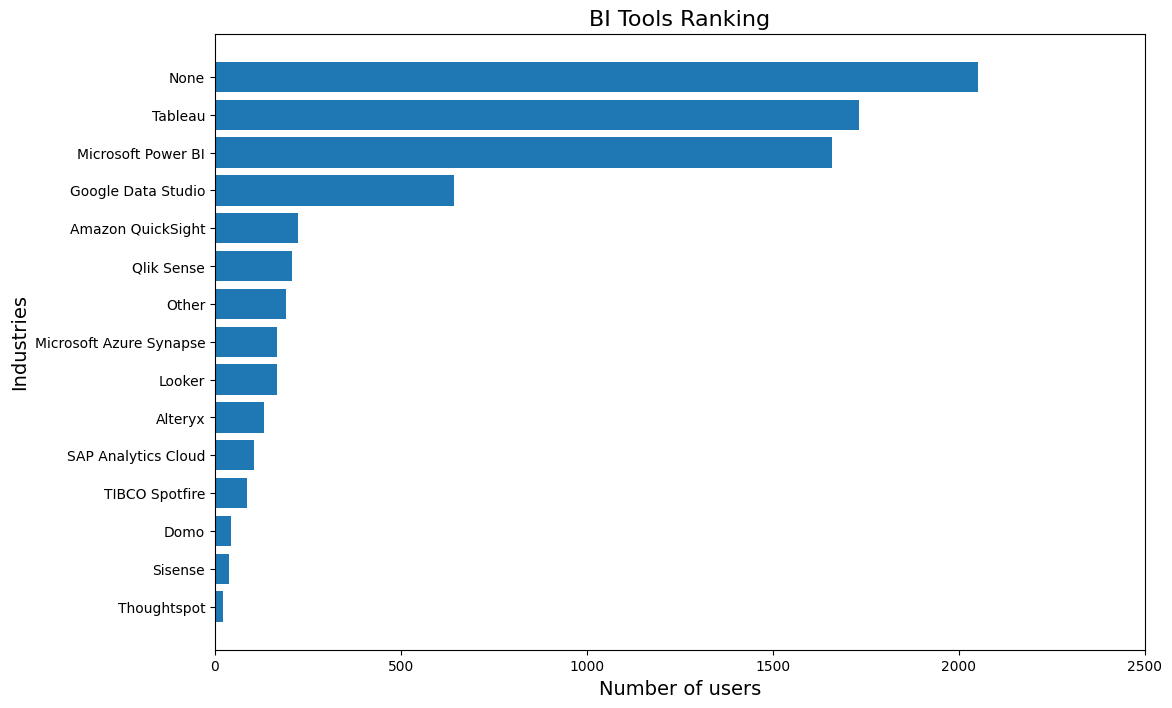

In [409]:
plt.figure(figsize=(12,8))

plt.xlabel("Number of users", fontsize=14)
plt.ylabel("Industries", fontsize=14)
plt.title("BI Tools Ranking", fontsize=16)
plt.xlim(0, 2500)

plt.barh(y=ranked_bi_tools.index, width=ranked_bi_tools["Totals"])

plt.show()

In [392]:
media_source_columns = [column for column in data.columns if column.startswith("Q44")]

In [399]:
media_source_name = list(data[media_source_columns].iloc[0].str.split("- ").str.get(-1).str.strip())

In [408]:
ranked_media_sources = (pd.DataFrame(data[media_source_columns]
                                     .rename(columns=dict(zip(media_source_columns, media_source_name)))
                                     .iloc[1:,]
                                     .fillna(0)
                                     .ne(0)
                                     .sum(), columns=["Totals"]).sort_values(by="Totals"))

ranked_media_sources

Totals
Other                                                  835
None                                                  1268
Slack Communities (ods.ai, kagglenoobs, etc)          1726
Podcasts (Chai Time Data Science, O’Reilly Data...    2120
Reddit (r/machinelearning, etc)                       2678
Email newsletters (Data Elixir, O'Reilly Data &...    3787
Journal Publications (peer-reviewed journals, c...    3804
Twitter (data science influencers)                    3995
Course Forums (forums.fast.ai, Coursera forums,...    4006
Blogs (Towards Data Science, Analytics Vidhya, ...    7766
Kaggle (notebooks, forums, etc)                      11181
YouTube (Kaggle YouTube, Cloud AI Adventures, etc)   11957

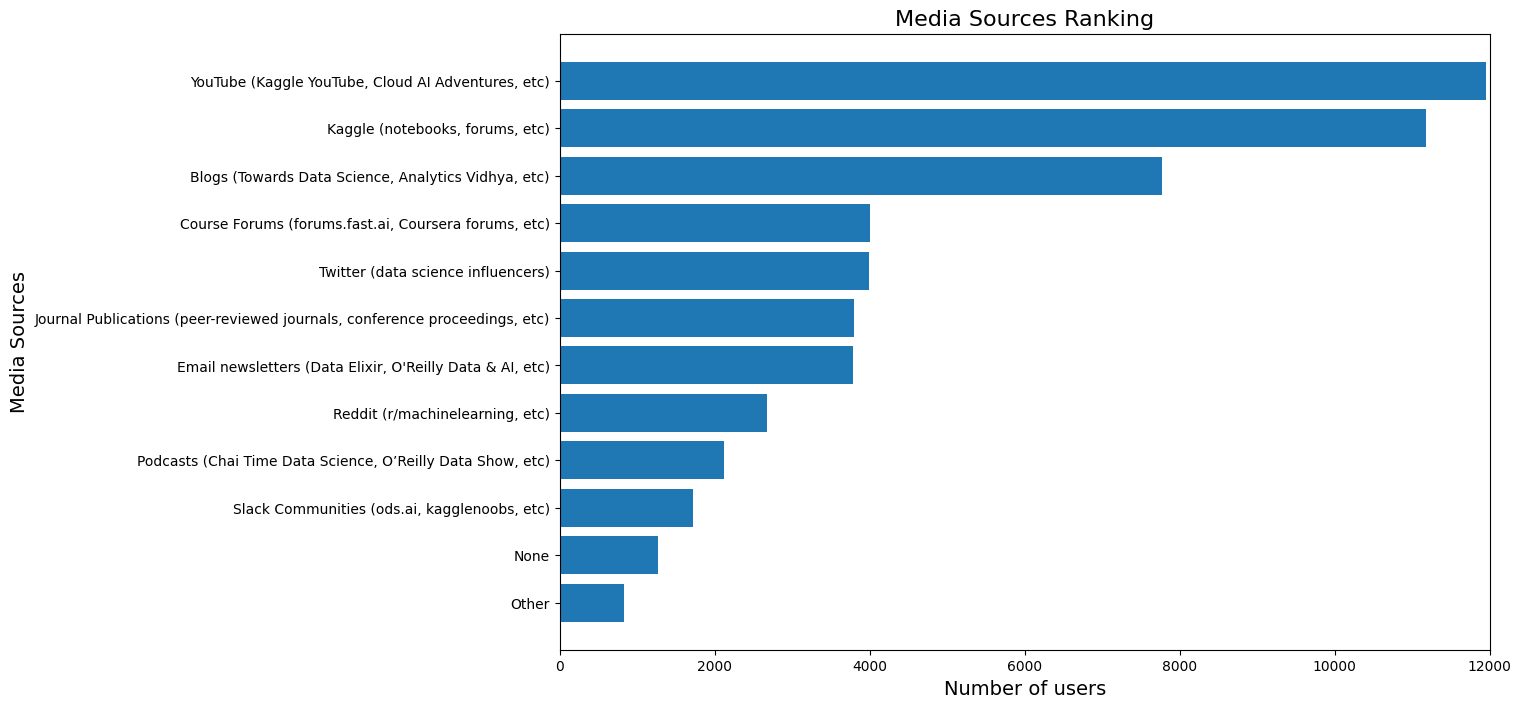

In [412]:
plt.figure(figsize=(12,8))

plt.xlabel("Number of users", fontsize=14)
plt.ylabel("Media Sources", fontsize=14)
plt.title("Media Sources Ranking", fontsize=16)
plt.xlim(0, 12000)

plt.barh(y=ranked_media_sources.index, width=ranked_media_sources["Totals"])

plt.show()